# 完整建模代码（可复用）

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [454]:
column_name=['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg','os','battery_capacity','storage','screen_size']

# names = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
xy_1 = pd.read_table('ZZ0625GuangFa_Samples100000_FeatureData.txt',names=column_name)
xy_1.head()

,id,target,card_type,netlong,owner_city,arpu,out_prdct_fee,prdct_fee,point_fee,myth_fee,...,age,adis,arpu_avg,myth_fee_avg,out_prdct_fee_avg,prdct_fee_avg,os,battery_capacity,storage,screen_size
0,13414974273,0,0.0,NaN,广东湛江,44.99,0.0,33.0,0.0,0.0,...,NaN,NaN,46.063334,0.0,NaN,33.0,4.0,3100mAh,16GB,5.5
1,13417213065,0,3.0,NaN,广东清远,51.00,0.0,43.0,0.0,0.0,...,38.0,NaN,48.750000,0.0,NaN,43.0,4.0,3000mAh,16GB,5.5
2,13421798940,0,3.0,24.0,广东云浮,24.00,0.0,14.0,0.0,0.0,...,NaN,NaN,158.000000,0.0,NaN,148.0,4.0,4000mAh,16GB/32GB,5.5
3,13428289319,0,1.0,NaN,广东江门,58.20,0.0,58.0,0.0,0.0,...,NaN,NaN,58.333333,0.0,NaN,58.0,4.0,2900mAH,64GB,5.5
4,13434989430,1,1.0,NaN,广东揭阳,88.00,0.0,88.0,0.0,0.0,...,NaN,NaN,88.066666,0.0,NaN,88.0,3.0,1960mAh,32GB/128GB/256GB,4.7


In [282]:
# 各个标签含义
# tags.tag_1102_card_type	1474843623	卡类型dated='2018-12'
# tags.tag_1102_netlong	1474843623	在网时长dated='2018-12'
# tags.tag_1102_owner_city	1474843623	城市dated='2018-12'
# tags.tag_1202_arpu_avg	1112410385	近三月话费均值	dated='2018-12'
# tags.tag_1202_myth_fee_avg	1112410385	国际漫游费3个月平均dated='2018-12'
# tags.tag_1202_out_prdct_fee_avg	1112410385	套餐外费用3个月平均dated='2018-12'
# tags.tag_1202_prdct_fee_avg	1112410385		套餐费用3月平均dated='2018-12'
# tags.tag_1202_arpu	1058742533		话费dated='2018-12'
# tags.tag_1202_out_prdct_fee	1057249288	套餐外总消费	dated='2018-12'
# tags.tag_1202_prdct_fee	1053440450	套餐及固定费用	dated='2018-12'
# tags.tag_1202_point_fee	1053014732	积分余额	dated='2018-12'
# tags.tag_1202_myth_fee	1053014703	国际漫游通话费	dated='2018-12'
# tags.tag_1103_brand	935395250	手机品牌dt='2018-12'
# tags.tag_1103_listing_date	919480062	手机上市时间dt='2018-12'
# tags.tag_1103_listing_price	859242535	手机上市价格dt='2018-12'
# tags.tag_1102_nettime	781440285	入网时间	dt='2018-12'
# tags.tag_1102_user_level	656313610	用户等级dated='2018-12'
# tags.tag_1101_sex	411770996	性别dt='2018-12'
# tags.tag_1102_family_client	322345203	家庭V网dated='201812'
# tags.tag_1102_group_client	319400845	集团V网dated='201812'
# tags.tag_1301_music	273871168	音乐dated='201812'
# tags.tag_1102_expirationtime	239600355	手机号销号时间	dt='2018-12'
# tags.tag_1301_video_member	202054121	视频套餐dated='201812'
# tags.tag_1301_other_tv	120023125	其他视频dated='201812'
# tags.tag_1301_finance	118375804	财经dated='201812'
# tags.tag_1301_bank	116810440	银行dated='201812'
# tags.tag_1102_campus_client	79942419	校园V网	dated='201812'
# tags.tag_1301_migu_tv	73254768	咪咕音乐dated='201812'
# tags.tag_1101_age	54468097	年龄dt='2018-12'
# tags.tag_1102_adis	51319079	宽带	dated='201812'
# 带derive_1后缀的是空值衍生变量
# 带derive_2后缀的是分箱衍生变量

In [455]:
xy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107961 entries, 0 to 107960
Data columns (total 36 columns):
id                   107961 non-null int64
target               107961 non-null int64
card_type            107141 non-null float64
netlong              39098 non-null float64
owner_city           107141 non-null object
arpu                 104781 non-null float64
out_prdct_fee        104781 non-null float64
prdct_fee            104781 non-null float64
point_fee            104781 non-null float64
myth_fee             104781 non-null float64
brand                83648 non-null object
listing_date         82570 non-null float64
listing_price        79016 non-null float64
nettime              39098 non-null object
user_level           61278 non-null float64
sex                  43502 non-null float64
family_client        37875 non-null float64
group_client         20396 non-null float64
music                26539 non-null float64
expirationtime       4887 non-null object
video_mem

In [456]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
#cat_list = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
cat_list=column_name
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.id特征的类型数量是：100000
2.target特征的类型数量是：2
3.card_type特征的类型数量是：6
4.netlong特征的类型数量是：58
5.owner_city特征的类型数量是：262
6.arpu特征的类型数量是：19147
7.out_prdct_fee特征的类型数量是：4884
8.prdct_fee特征的类型数量是：3606
9.point_fee特征的类型数量是：7570
10.myth_fee特征的类型数量是：181
11.brand特征的类型数量是：689
12.listing_date特征的类型数量是：1136
13.listing_price特征的类型数量是：598
14.nettime特征的类型数量是：36767
15.user_level特征的类型数量是：8
16.sex特征的类型数量是：2
17.family_client特征的类型数量是：1
18.group_client特征的类型数量是：1
19.music特征的类型数量是：1
20.expirationtime特征的类型数量是：4832
21.video_member特征的类型数量是：1
22.other_tv特征的类型数量是：1
23.finance特征的类型数量是：1
24.bank特征的类型数量是：1
25.campus_client特征的类型数量是：1
26.migu_tv特征的类型数量是：1
27.age特征的类型数量是：57
28.adis特征的类型数量是：1
29.arpu_avg特征的类型数量是：53350
30.myth_fee_avg特征的类型数量是：407
31.out_prdct_fee_avg特征的类型数量是：17250
32.prdct_fee_avg特征的类型数量是：7969
33.os特征的类型数量是：10
34.battery_capacity特征的类型数量是：445
35.storage特征的类型数量是：135
36.screen_size特征的类型数量是：70


In [457]:
# 去除重复行：
xy_1.drop_duplicates(keep='first',inplace=True)
xy_1.reset_index(inplace=True)

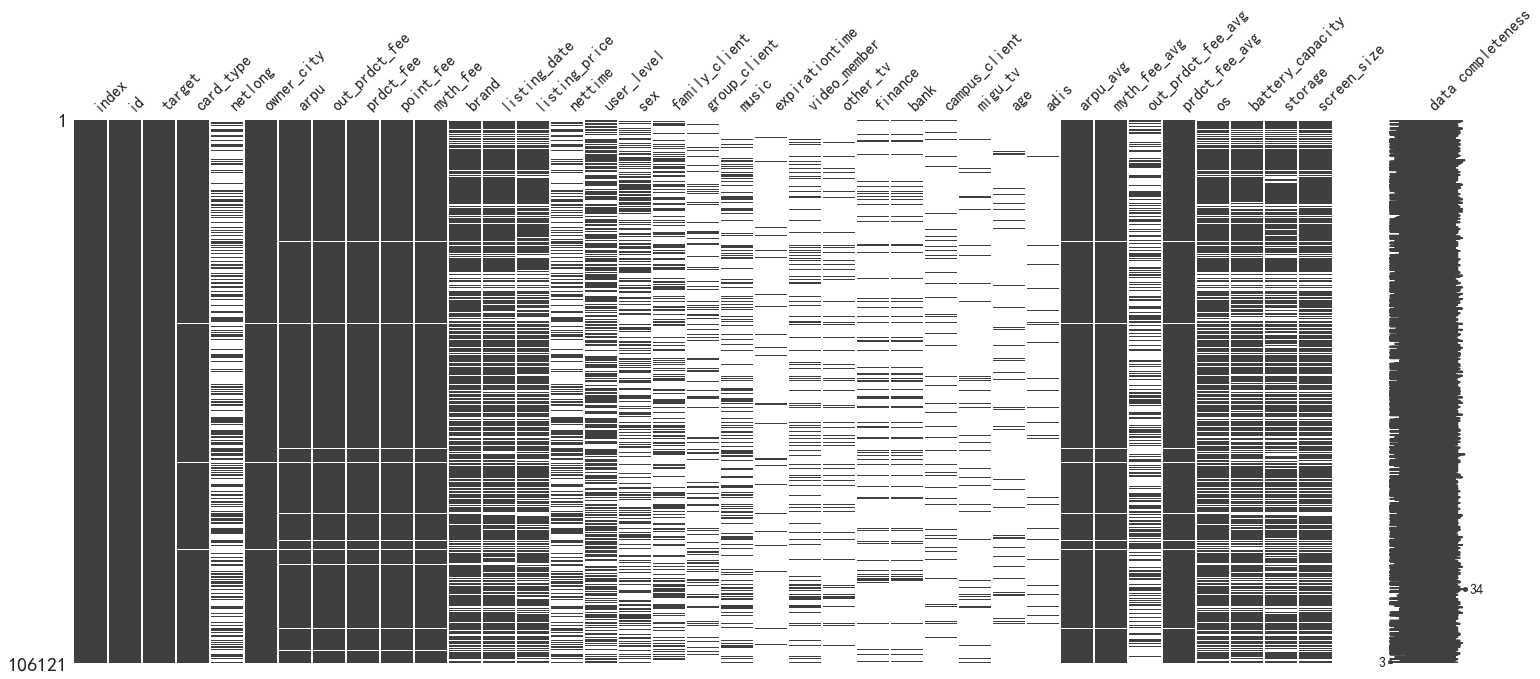

In [458]:
msno.matrix(xy_1,labels = True)

In [460]:
xy_1.shape

(106121, 37)

In [459]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,37
Number of observations,106121
Total Missing (%),41.2%
Total size in memory,30.0 MiB
Average record size in memory,296.0 B
Numeric,20
Categorical,6
Boolean,11
Date,0
Text (Unique),0
Rejected,0


In [288]:
#根据手机上市时间衍生出，上市到现在的累计月份变量listing_data_months
#核心代码，转换，array转换成str使用[:]，转换成int加减
def month_sept(data):
    lst1=[]
    for n in range(len(data)):
        a=data.loc[n]['listing_date']
        if '2019' in str(a):
            month_num = str(a)[4:6]
            lst1.append(month_num)
        elif '2018' in str(a):
            month_num = 12-int(str(a)[4:6])+4
            lst1.append(month_num)
        elif( '2017' in str(a)) and (str(a)!='2017.0'):
            month_num = 12-int(str(a)[4:6])+4+12
            lst1.append(month_num)
        elif '2016' in str(a)and (str(a)!='2016.0'):
            month_num = 12-int(str(a)[4:6])+4+24
            lst1.append(month_num)
        elif '2015' in str(a)and (str(a)!='2015.0'):
            month_num = 12-int(str(a)[4:6])+4+36
            lst1.append(month_num)
        elif '2014' in str(a)and (str(a)!='2014.0'):
            month_num = 12-int(str(a)[4:6])+4+48
            lst1.append(month_num)
        elif '2013' in str(a) and(str(a)!='2013.0'):
            month_num = 12-int(str(a)[4:6])+4+60
            lst1.append(month_num)
    c= pd.concat([xy_1,pd.DataFrame(lst1)],axis=1)
    c.rename(columns={0:'listing_data_months'},inplace = True)
    return c
xy_2 = month_sept(xy_1)

In [289]:
xy_3 = pd.read_table('city_ranking.txt',names = ['owner_city','owner_city_level'])

In [290]:
xy_5 = pd.merge(xy_2,xy_3,on='owner_city',how = 'left')

In [291]:
# 第一：空值大于90%排除掉 5项，剩余25项
# expirationtime       5005 non-null object√
# campus_client        7960 non-null float64√
# migu_tv              6368 non-null float64√
# age                  5190 non-null float64√
# adis                 4909 non-null float64√
# 第二：入网时间与入网时长重复，排除，   3项，剩余22项
# nettime              46214 non-null object√
# listing_date         44166 non-null float64√
# myth_fee 0值加上空值超过90%，去除√
# myth_fee has 100909 / 98.6% zeros Zeros
# myth_fee has 1145 / 1.1% missing values Missing
# myth_fee_avg has 100862 / 98.6% zeros Zeros

#去除掉以上列
#xy_6 = xy_5[['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','brand','listing_price','user_level','sex','family_client','group_client','music','other_tv','video_member','finance','bank','arpu_avg','out_prdct_fee_avg','prdct_fee_avg','listing_data_months','owner_city_level']]
usefulcolumnlist=['target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','brand','listing_price','user_level','sex','family_client','group_client','music','video_member','other_tv','finance','bank','arpu_avg','out_prdct_fee_avg','prdct_fee_avg','listing_data_months','owner_city_level','battery_capacity','storage','screen_size']

xy_6 = xy_5[usefulcolumnlist]


In [292]:
xy_6[['battery_capacity','storage','screen_size']].head()

,battery_capacity,storage,screen_size
0,NaN,NaN,NaN
1,2850mAh,64GB,5.5
2,NaN,NaN,NaN
3,3230mAH,64GB,5.5
4,4000mAh,64GB,5.8


In [293]:
xy_6['battery_capacity'].value_counts()

def DealBatteryFormat(RowSeriers):
    return str(RowSeriers.battery_capacity).lower()
xy_6['battery_capacity']=xy_6.apply(DealBatteryFormat,axis=1)


In [294]:
#xy_6['screen_size'].value_counts()/len(xy_6['screen_size'])


In [326]:
# #xy_6['battery_capacity'].value_counts()/len(xy_6['battery_capacity'])
# display(xy_6['screen_size'].fillna('空值').head())
# xy_6['screen_size']=xy_6['screen_size'].fillna('空值')

# test_xy_6=xy_6
# test_xy_6['screen_size']=test_xy_6['screen_size'].astype(str)
# display(test_xy_6['screen_size'][1],type(test_xy_6['screen_size'][1]))
# test_xy_6['screen_size'][~test_xy_6['screen_size'].isin(['5.5','4.7','5','5.2','4','6','5.7','5.8','4.5','5.1','5.9','3.5','空值'])] ='其它屏幕'

# test_xy_6['screen_size'].head(100)

In [328]:
# 第四：分为类别型和连续分别衍生 18项     101154缺失30%以上则是，
# 70807以下的数据量要构造成（空值、0、大于0三类），70807以上的数据量空值填充999
# card_type            97392 non-null float64√
# netlong              37821 non-null float64√
# owner_city           97227 non-null object√
# arpu                 101154 non-null float64
# out_prdct_fee        101154 non-null float64
# prdct_fee            101154 non-null float64
# point_fee            101154 non-null float64
# brand                73374 non-null object
# listing_price        68191 non-null float64
# user_level           63019 non-null float64
# sex                  35649 non-null float64
# family_client        30493 non-null float64
# group_client         29219 non-null float64
# music                24849 non-null float64
# video_member         18601 non-null float64
# other_tv             11128 non-null float64√
# finance              10914 non-null float64√
# bank                 10781 non-null float64√
# arpu_avg             101355 non-null float64
# out_prdct_fee_avg    47245 non-null float64
# prdct_fee_avg        101355 non-null float64
# owner_city_level       42548 non-null float64（留用）√
# listing_data_months
#netlong空值填充为999
xy_6['other_tv'].value_counts()
xy_6['other_tv'] = xy_6['other_tv'].fillna(9999)
xy_6['other_tv'].value_counts()

xy_6['finance'].value_counts()
xy_6['finance'] = xy_6['finance'].fillna(9999)
xy_6['finance'].value_counts()

xy_6['bank'].value_counts()
xy_6['bank'] = xy_6['bank'].fillna(9999)
xy_6['bank'].value_counts()

xy_6['owner_city'].value_counts()
xy_6['owner_city'] = xy_6['owner_city'].fillna(9999)
xy_6['owner_city'].value_counts()

xy_6['card_type'].value_counts()
xy_6['card_type'] = xy_6['card_type'].fillna(9999)
xy_6['card_type'].value_counts()

xy_6['netlong'].value_counts()
xy_6['netlong'] = xy_6['netlong'].fillna(9999)
xy_6['netlong'].value_counts()

# arpu 空值填充为999 ，异常值处理
xy_6['arpu'].value_counts()
xy_6['arpu'].describe()
xy_6['arpu'][xy_6['arpu']>500].value_counts()#u+1.5标准差3000
xy_6['arpu'][xy_6['arpu']>500] = 41.82#中位数替换异常值
xy_6['arpu'] = xy_6['arpu'].fillna(9999)
xy_6['arpu'].value_counts()
# arpu_avg
xy_6['arpu_avg'].value_counts()#空值填充为999 ，异常值处理
xy_6['arpu_avg'].describe()
xy_6['arpu_avg'][xy_6['arpu_avg']>3000].value_counts()#u+1.5标准差3000
xy_6['arpu_avg'][xy_6['arpu_avg']>3000] = 43.54#中位数替换异常值
xy_6['arpu_avg'] = xy_6['arpu_avg'].fillna(9999)
xy_6['arpu_avg'].value_counts()

# out_prdct_fee 空值填充为999，异常值处理,Nan没超过30%，按时0值超过了50%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee'].value_counts()
xy_6['out_prdct_fee'].describe()
xy_6['out_prdct_fee'][xy_6['out_prdct_fee']>0] = 1
xy_6['out_prdct_fee'] = xy_6['out_prdct_fee'].fillna(9999)
xy_6['out_prdct_fee'].value_counts()
# out_prdct_fee_avg Nan超过30%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee_avg'].value_counts()
xy_6['out_prdct_fee_avg'].describe()
xy_6['out_prdct_fee_avg'][xy_6['out_prdct_fee_avg']>0] = 1
xy_6['out_prdct_fee_avg'] = xy_6['out_prdct_fee_avg'].fillna(9999)
xy_6['out_prdct_fee_avg'].value_counts()

# prdct_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['prdct_fee'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee'][xy_6['prdct_fee']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
# xy_6['prdct_fee'].describe()
xy_6['prdct_fee'][xy_6['prdct_fee']>500].value_counts()#中位数替换异常值
xy_6['prdct_fee'][xy_6['prdct_fee']>500] = 23
xy_6['prdct_fee'] = xy_6['prdct_fee'].fillna(9999)
xy_6['prdct_fee'].value_counts()
# prdct_fee_avg空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['prdct_fee_avg'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
xy_6['prdct_fee_avg'].describe()
xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500].value_counts()#中位数替换异常值
xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500] = 24.6
xy_6['prdct_fee_avg'] = xy_6['prdct_fee_avg'].fillna(9999)
xy_6['prdct_fee_avg'].value_counts()

# point_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值（27824）超过50%，构造（空，0，大于0三类）
xy_6['point_fee'].value_counts()
xy_6['point_fee'][xy_6['point_fee']>0] = 1
xy_6['point_fee'] = xy_6['point_fee'].fillna(9999)
xy_6['point_fee'].value_counts()

# sex 构造3类
xy_6['sex'].value_counts()
xy_6['sex'] = xy_6['sex'].fillna(9999)
xy_6['sex'].value_counts()

# family_client Nan超过30%，构造（空，1两类）
xy_6['family_client'].value_counts()
xy_6['family_client'] = xy_6['family_client'].fillna(9999)
xy_6['family_client'].value_counts()

# group_client  Nan超过30%，构造（空，1两类）
xy_6['group_client'].value_counts()
xy_6['group_client'] = xy_6['group_client'].fillna(9999)
xy_6['group_client'].value_counts()

# music  Nan超过30%，构造（空，1两类）
xy_6['music'].value_counts()
xy_6['music'] = xy_6['music'].fillna(9999)
xy_6['music'].value_counts()

# video_member Nan超过30%，构造（空，1两类）
xy_6['video_member'].value_counts()
xy_6['video_member'][xy_6['video_member'].notnull()] = 1
xy_6['video_member'] = xy_6['video_member'].fillna(9999)
xy_6['video_member'].value_counts()


# listing_data_months 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['listing_data_months'].value_counts()
xy_6['listing_data_months'] = xy_6['listing_data_months'].fillna(9999)
xy_6['listing_data_months'].value_counts()

# user_level  空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['user_level'].value_counts()
xy_6['user_level'] = xy_6['user_level'].fillna(9999)
xy_6['user_level'].value_counts()

# listing_price 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['listing_price'].value_counts()
xy_6['listing_price'] = xy_6['listing_price'].fillna(9999)
xy_6['listing_price'].value_counts()

# brand 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['brand'].value_counts()
xy_6['brand'] = xy_6['brand'].fillna(9999)
xy_6['brand'].value_counts()

# owner_city_level
xy_6['owner_city_level'].value_counts()
xy_6['owner_city_level'] = xy_6['owner_city_level'].fillna(9999)
xy_6['owner_city_level'].value_counts()
#以上，异常值，空值处理完毕

xy_6['brand'].value_counts()
xy_6['brand'][xy_6['brand']==9999] = '空值'
xy_6['brand'][~xy_6['brand'].isin(['vivo','OPPO','苹果','小米','华为','华为荣耀','三星','金立','酷派','魅族','空值'])] ='其它品牌'
xy_6['brand'].value_counts()

# ['battery_capacity','storage','screen_size']
xy_6['battery_capacity'] = xy_6['battery_capacity'].fillna(9999)
xy_6['battery_capacity'].value_counts()
xy_6['battery_capacity'][xy_6['battery_capacity']=='nan'] = '空值'
xy_6['battery_capacity'][~xy_6['battery_capacity'].isin(['3000mah','nan','4000mah','1715mah','3050mah','2000mah','1800mah','2750mah','2910mah','1960mah','2900mah','2400mah','3010mah','3100mah','2200mah','2930mah','2850mah','2600mah','2300mah','4100mah','2550mah','3075mah','2500mah','1900mah','2350mah'])] ='其它电池'

xy_6['storage'] = xy_6['storage'].fillna('空值')
xy_6['storage'][~xy_6['storage'].isin(['64GB','16GB','32GB','16GB/64GB/128GB','16GB/32GB/64GB/128GB','32GB/128GB/256GB','64GB/128GB','32GB/64GB','4GB','8GB','64/128GB','16GB/32GB','32GB/64GB/128GB','8GB/16GB','128GB','32/64GB','16GB/32GB/64GB','512MB','128MB','16GB/64GB/32GB/128GB','64GB/128GB/256GB','16/32GB','8/16GB','32MB','16/64/128GB','16/64GB','16/32/64GB','32GB/128GB','64GB/128GB/32GB','64GB/256GB'])] ='其它存储'

xy_6['screen_size'] = xy_6['screen_size'].fillna('空值')
xy_6['screen_size']=xy_6['screen_size'].astype(str)
xy_6['screen_size'][~xy_6['screen_size'].isin(['5.5','4.7','5','5.2','4','6','5.7','5.8','4.5','5.1','5.9','3.5','空值'])] ='其它屏幕'


# #以上，异常值，空值处理完毕

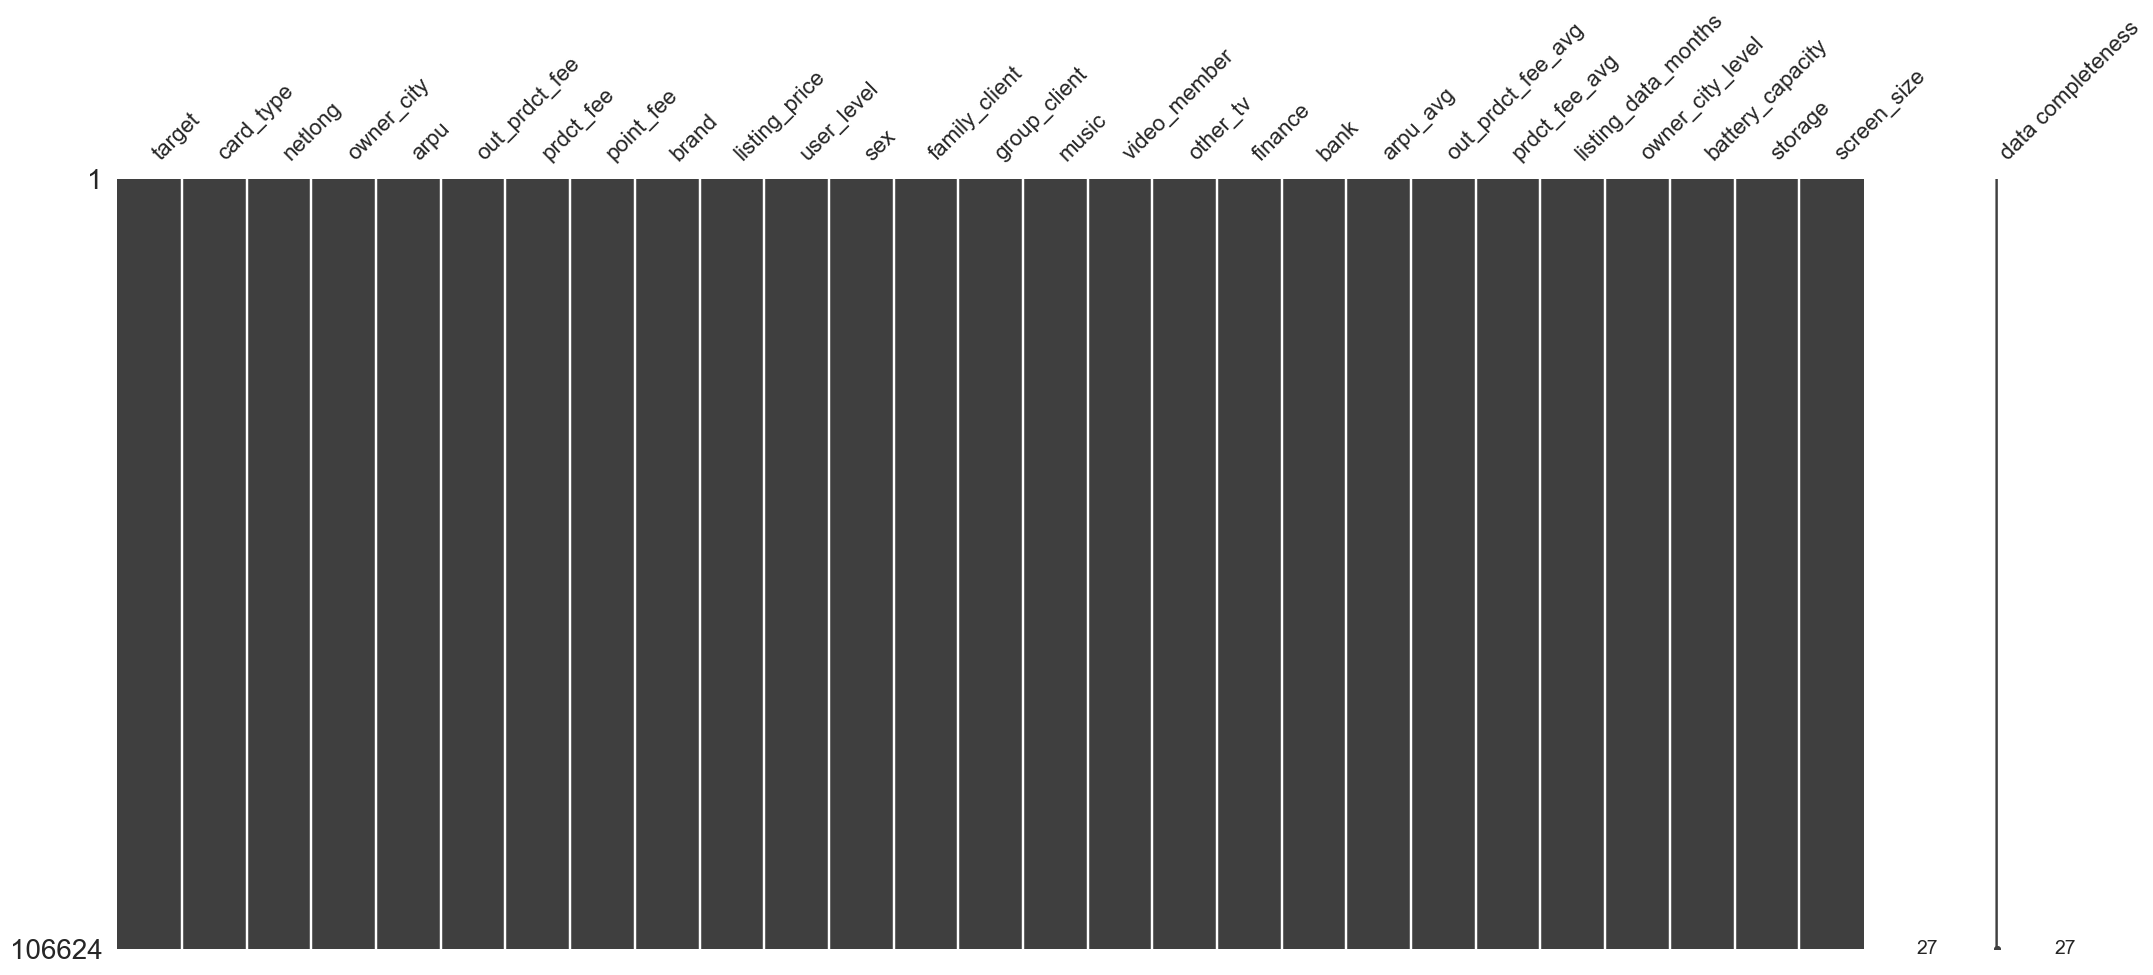

In [329]:
# usefulcolumnlist=['target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','brand','listing_price','user_level','sex','family_client','group_client','music','video_member','other_tv','finance','bank','arpu_avg','out_prdct_fee_avg','prdct_fee_avg','listing_data_months','owner_city_level','battery_capacity','storage','screen_size']

msno.matrix(xy_6,labels = True)

In [330]:
usefulcolumn2=['arpu','arpu_avg','battery_capacity','brand','card_type','family_client','finance','group_client','listing_data_months','listing_price','music','netlong','other_tv','out_prdct_fee_avg','owner_city','owner_city_level','screen_size','sex','storage','target','user_level','video_member']
xy_6=xy_6[usefulcolumn2]
# 去除重复行：
xy_6.drop_duplicates(subset= ['arpu','arpu_avg','listing_data_months','listing_price','netlong','out_prdct_fee_avg','screen_size'],keep='first',inplace=True)
xy_6.reset_index(inplace=True)

pandas_profiling.ProfileReport(xy_6)

Number of variables,23
Number of observations,105159
Total Missing (%),0.0%
Total size in memory,18.5 MiB
Average record size in memory,184.0 B
Numeric,10
Categorical,5
Boolean,7
Date,0
Text (Unique),0
Rejected,1


In [331]:
# display(xy_6[['arpu','arpu_avg','listing_data_months','listing_price','netlong','screen_size']].info())
# display((xy_6['screen_size']==9999).sum())

# xy_6test=xy_6[(0<xy_6['screen_size'])&(xy_6['screen_size']<9999)]
# xy_6test['screen_size'].value_counts()/len(xy_6test)
# #pd.qcut(xy_6test['screen_size'],3)

In [332]:


#核心代码：遍历版分箱操作
def column_binning(data):
    column_list = ['arpu','arpu_avg','listing_data_months','listing_price','netlong']
    xy_10 = data
    for column in column_list:
        print(column)
        xy_10.insert(2,column+'_derive_1',xy_10[column])
        xy_7 = xy_10[(xy_10[column+'_derive_1'] == 9999) | (xy_10[column+'_derive_1'] == 0)]
        xy_8 = xy_10[(0<xy_10[column+'_derive_1'])&(xy_10[column+'_derive_1']<9999)]
        xy_8[column+'_derive_1'] = pd.qcut(xy_8[column+'_derive_1'],8)
        xy_9 = pd.concat([xy_8,xy_7],axis = 0)
        xy_10 = xy_9#循环一次的结果作为下一次循环的开始数据，不能直接给data复制，所以需要有xy_10这个中间变量
    return xy_9
xy_9=column_binning(xy_6)

arpu
arpu_avg
listing_data_months
listing_price
netlong


# 导出分箱文件

In [333]:
xy_9.to_excel('20190624广发_信用卡_分箱.xlsx',index = None)

In [334]:
ChuanQi_basic_df=xy_9
ChuanQi_basic_df=ChuanQi_basic_df[['target','netlong_derive_1','listing_price_derive_1','listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1','arpu','arpu_avg', 'battery_capacity', 'brand', 'card_type', 'family_client','finance', 'group_client', 'listing_data_months', 'listing_price','music', 'netlong', 'other_tv', 'out_prdct_fee_avg', 'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage','user_level', 'video_member']]

ChuanQi_basic_df.reset_index(inplace=True,drop=True)
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.shape)

,target,netlong_derive_1,listing_price_derive_1,listing_data_months_derive_1,arpu_avg_derive_1,arpu_derive_1,arpu,arpu_avg,battery_capacity,brand,...,netlong,other_tv,out_prdct_fee_avg,owner_city,owner_city_level,screen_size,sex,storage,user_level,video_member
0,1,"(25.0, 31.0]","(2798.0, 3498.0]","(16.999, 27.0]","(78.662, 107.1]","(75.0, 103.5]",95.60,94.100001,2850mah,OPPO,...,28.0,9999.0,1.0,福建泉州,5.0,5.5,9999.0,64GB,9999.0,1.0
1,0,"(18.0, 25.0]","(1599.0, 2498.0]","(43.0, 46.0]","(48.767, 78.662]","(41.82, 75.0]",54.85,55.653333,其它电池,vivo,...,24.0,9999.0,1.0,河南洛阳,5.0,5.5,9999.0,64GB,0.0,1.0
2,0,"(31.0, 35.0]","(24.999, 1199.0]","(16.999, 27.0]","(78.662, 107.1]","(132.0, 161.5]",149.00,102.989998,2200mah,vivo,...,35.0,1.0,1.0,江苏扬州,5.0,4.7,9999.0,8GB,2.0,1.0
3,0,"(50.0, 57.0]","(1599.0, 2498.0]","(31.0, 36.0]","(2.742, 48.767]","(0.099, 41.82]",37.10,31.553333,其它电池,魅族,...,52.0,9999.0,1.0,黑龙江齐齐哈尔,8.0,5.5,1.0,32GB,1.0,1.0
4,0,"(44.0, 50.0]","(1599.0, 2498.0]","(29.0, 31.0]","(107.1, 136.23]","(132.0, 161.5]",133.29,126.463333,其它电池,vivo,...,49.0,1.0,1.0,浙江温州,4.0,5.5,1.0,64GB,3.0,1.0


(105087, 27)

In [335]:
def DealBrandOPP0(RowSeries):
    BrandName=RowSeries.brand
    if BrandName in ['OPPO','OPPO ']:
        return 'OPPO'
    else:
        return BrandName
ChuanQi_basic_df.brand=ChuanQi_basic_df.apply(DealBrandOPP0,axis=1)

brand_group=ChuanQi_basic_df.groupby('target')['brand']

In [336]:
def brand_num(ChuanQi_basic_df):
    title_mapping = {'苹果':1,'华为':2,'小米':3,'华为荣耀':4,'三星':5,'OPPO':6,'vivo':7,'魅族':8,'金立':9,'酷派':10,'空值':11,'其它品牌':12}
    ChuanQi_basic_df['brand'] = ChuanQi_basic_df['brand'].map(title_mapping)
brand_num(ChuanQi_basic_df)

In [337]:
ChuanQi_basic_df.columns

Index(['target', 'netlong_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

In [338]:
import numpy as np
#convernetlong_derive_2	listing_price_derive_2
#interval_list=['listing_data_months_derive_1','prdct_fee_avg_derive_1','arpu_avg_derive_1','prdct_fee_derive_1','listing_price_derive_1','arpu_derive_1','netlong_derive_1']
# 传奇游戏特征选择后的连续值：
#interval_list=['arpu_derive_1','listing_price','prdct_fee','arpu_avg','prdct_fee_avg','listing_data_months']

# 网贷游戏特征选择后的连续变量：
interval_list=[ 'netlong_derive_1', 'listing_price_derive_1','listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',]
# 将区间值列的中间对应值：

intervalcolumn_df={}

def ConverIntervalData():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn]=ChuanQi_basic_df[intervalcolumn].astype('str')
        intervalunique=ChuanQi_basic_df[intervalcolumn].unique()
        #print(intervalunique)
        intervalcolumn_df[intervalcolumn]={'intervaluniquelist':[]}
        intervalcolumn_df[intervalcolumn]['intervaluniquelist']=intervalunique
        intervalcolumn_df[intervalcolumn]['intervalValueDict']={}
        for intervalValue in intervalunique:
            intervalLeft=0.0
            intervalRight=0.0
            #print(intervalValue)
            if ', ' in intervalValue:
                intervalValueSplit=intervalValue.split(', ')
                intervalLeft=float(intervalValueSplit[0].split('(')[1])
                intervalRight=float(intervalValueSplit[1].split(']')[0])
                #print(intervalValueSplit,intervalLeft,intervalRight)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
            else:
                intervalLeft=float(intervalValue)
                intervalRight=float(intervalValue)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
        
        intervalcolumnAvg=[]
        for intervalValuekey in intervalcolumn_df[intervalcolumn]['intervalValueDict']:
            intervalcolumnAvg.append(intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValuekey])
        intervalcolumnAvg=np.array(intervalcolumnAvg)
        intervalcolumnAvgSortIndex=intervalcolumnAvg.argsort()
        maxpointvalue=(intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]-intervalcolumnAvg[intervalcolumnAvgSortIndex[-3]])/2+intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]
        intervalcolumn_df[intervalcolumn]['intervalValueDict']['9999']=maxpointvalue
        #print(intervalcolumnAvg,maxpointvalue)      
ConverIntervalData() 

In [339]:
# 将interval 列的数据进行替换操作：

def ReplaceIntervalColumnValue():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn].replace(intervalcolumn_df[intervalcolumn]['intervalValueDict'],inplace=True)
        #print(a.head(10),ChuanQi_basic_df[intervalcolumn].head(10))
ReplaceIntervalColumnValue()

In [340]:
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.columns)

,target,netlong_derive_1,listing_price_derive_1,listing_data_months_derive_1,arpu_avg_derive_1,arpu_derive_1,arpu,arpu_avg,battery_capacity,brand,...,netlong,other_tv,out_prdct_fee_avg,owner_city,owner_city_level,screen_size,sex,storage,user_level,video_member
0,1,28.0,3148.0000,21.9995,92.8810,89.2500,95.60,94.100001,2850mah,6,...,28.0,9999.0,1.0,福建泉州,5.0,5.5,9999.0,64GB,9999.0,1.0
1,0,21.5,2048.5000,44.5000,63.7145,58.4100,54.85,55.653333,其它电池,7,...,24.0,9999.0,1.0,河南洛阳,5.0,5.5,9999.0,64GB,0.0,1.0
2,0,33.0,611.9995,21.9995,92.8810,146.7500,149.00,102.989998,2200mah,7,...,35.0,1.0,1.0,江苏扬州,5.0,4.7,9999.0,8GB,2.0,1.0
3,0,53.5,2048.5000,33.5000,25.7545,20.9595,37.10,31.553333,其它电池,8,...,52.0,9999.0,1.0,黑龙江齐齐哈尔,8.0,5.5,1.0,32GB,1.0,1.0
4,0,47.0,2048.5000,30.0000,121.6650,146.7500,133.29,126.463333,其它电池,7,...,49.0,1.0,1.0,浙江温州,4.0,5.5,1.0,64GB,3.0,1.0


Index(['target', 'netlong_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

In [341]:
#classifycolumnlist=['target','listing_data_months_derive_1','prdct_fee_avg_derive_1','arpu_avg_derive_1','prdct_fee_derive_1','listing_price_derive_1','arpu_derive_1','netlong_derive_1','card_type','netlong','owner_city','brand','user_level','sex','family_client','group_client','music','video_member','owner_city_level','out_prdct_fee']
#ChuanQi_basic_df=ChuanQi_basic_df[classifycolumnlist]

ChuanQi_basic_df.to_excel('20190624广发_信用卡_清洗后.xlsx',index=None)

#  导出清洗后的数据

In [342]:
def ClassifyFeedBack(classifycolumnlist,origindf):
    columnvaluecount_dict={}
    for classifycolumn in classifycolumnlist:
        columngroupvaluecount=origindf.groupby('target')[classifycolumn].value_counts()
        columnvaluecount=origindf[classifycolumn].value_counts()
        if classifycolumn not in columnvaluecount_dict:            
            columnvaluecount_dict[classifycolumn]={}
            columnvaluecount_dict[classifycolumn]['target_group']=columngroupvaluecount
        columnvaluecount_dict[classifycolumn]['columnvaluecount']=columnvaluecount
    return columnvaluecount_dict  

In [343]:
ChuanQi_basic_df['brand'].value_counts()

1     26687
7     22166
11    13460
6      9884
12     7090
2      6606
5      5389
3      4255
4      4092
9      2788
8      1952
10      718
Name: brand, dtype: int64

In [344]:
AllColumnsName=['netlong_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
AllFeatureDF=ChuanQi_basic_df[AllColumnsName]
for column in AllFeatureDF.columns:
    print(column,len(AllFeatureDF.groupby(column).size()))

netlong_derive_1 10
listing_price_derive_1 9
listing_data_months_derive_1 9
arpu_avg_derive_1 9
arpu_derive_1 9
arpu 25218
arpu_avg 63600
battery_capacity 25
brand 12
card_type 7
family_client 2
finance 2
group_client 2
listing_data_months 61
listing_price 444
music 2
netlong 59
other_tv 2
out_prdct_fee_avg 2
owner_city 150
owner_city_level 11
screen_size 11
sex 3
storage 31
user_level 9
video_member 1


In [345]:
usefualcolumns=['target','netlong_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
ChuanQi_basic_df=ChuanQi_basic_df[usefualcolumns]

In [346]:
#classifycolumnlist=['arpu_derive_1', 'netlong', 'arpu', 'out_prdct_fee', 'prdct_fee', 'point_fee', 'brand', 'listing_price', 'user_level', 'sex','family_client', 'group_client', 'arpu_avg', 'prdct_fee_avg','listing_data_months', 'owner_city_level']
classifycolumnlist=['netlong_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',
       'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
# classifycolumnlist=ChuanQi_basic_df.columns.tolist()
# classifycolumnlist.remove('id')
# classifycolumnlist.remove('target')
columnvaluecount_dict=ClassifyFeedBack(classifycolumnlist,ChuanQi_basic_df)

In [347]:
# 写个程序检索columnvaluecount_dict 中的不同分类列是否数据一致且要保证相同的特征的不同分区都必须必修要有覆盖，防止分区为空，或者人数为零···

def checkmatchCGVC_dict(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        ColumnAllGroupsIndex=columnvaluecount_dict[column]['columnvaluecount'].index
        TureSampleGroupsIndex=columnvaluecount_dict[column]['target_group'][1].index
        for GroupsIndex in ColumnAllGroupsIndex:
            if GroupsIndex not in TureSampleGroupsIndex: 
                if GroupsIndex not in columnvaluecount_dict[column]['target_group'][1].index:
                    columnvaluecount_dict[column]['target_group'][1,GroupsIndex]=0.00001

    return columnvaluecount_dict

columnvaluecount_dict=checkmatchCGVC_dict(columnvaluecount_dict)

In [348]:
# 计算正样本的反馈率···
import numpy as np
def CalculateTurnSampleFeedBack(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['TurnSampleFeedBack']=columnvaluecount_dict[column]['target_group'][1]/columnvaluecount_dict[column]['columnvaluecount']
        columnvaluecount_dict[column]['TurnSampleLogPercentRadio']=np.log(columnvaluecount_dict[column]['TurnSampleFeedBack']/(1-columnvaluecount_dict[column]['TurnSampleFeedBack']))
    return columnvaluecount_dict

columnvaluecount_dict=CalculateTurnSampleFeedBack(columnvaluecount_dict)
display(columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'].sort_values(ascending=False),columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'][1],)

8    -1.960036
10   -1.968383
6    -1.976318
11   -2.098811
7    -2.100576
12   -2.115323
4    -2.123918
9    -2.228704
3    -2.302068
1    -2.343664
2    -2.361782
5    -2.520829
Name: brand, dtype: float64

-2.343663793971878

In [349]:
display(columnvaluecount_dict['netlong_derive_1']['TurnSampleLogPercentRadio'].sort_values(ascending=False),columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'][1],)

netlong_derive_1
28.0000      -1.923622
9.4995       -1.958256
37.5000      -1.960405
21.5000      -2.028918
42.0000      -2.093752
33.0000      -2.115508
53.5000      -2.129631
47.0000      -2.165653
9999.0000    -2.280053
0.0000      -13.592366
Name: netlong_derive_1, dtype: float64

-2.343663793971878

In [350]:
# 对不同基础属性的类别值（分区）计算row_percent

def CalculateColumnRowPercent(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnRowPercent']=columnvaluecount_dict[column]['columnvaluecount']/columnvaluecount_dict[column]['columnvaluecount'].sum()
        
    return columnvaluecount_dict

columnvaluecount_dict=CalculateColumnRowPercent(columnvaluecount_dict)

In [351]:
# 将每个列的反馈率数值及覆盖率值输出出来···
def CreateColumnStatistics(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnStatistics']=pd.DataFrame({'RowPercent':columnvaluecount_dict[column]['TurnSampleFeedBack'],'Percent':columnvaluecount_dict[column]['ColumnRowPercent']})
        
    return columnvaluecount_dict

columnvaluecount_dict=CreateColumnStatistics(columnvaluecount_dict)
len(columnvaluecount_dict)

23

In [352]:
for column in AllFeatureDF.columns:
    print(column,len(AllFeatureDF.groupby(column).size()))

netlong_derive_1 10
listing_price_derive_1 9
listing_data_months_derive_1 9
arpu_avg_derive_1 9
arpu_derive_1 9
arpu 25218
arpu_avg 63600
battery_capacity 25
brand 12
card_type 7
family_client 2
finance 2
group_client 2
listing_data_months 61
listing_price 444
music 2
netlong 59
other_tv 2
out_prdct_fee_avg 2
owner_city 150
owner_city_level 11
screen_size 11
sex 3
storage 31
user_level 9
video_member 1


In [353]:
# 输出分类型变量的反馈率及覆盖率：
#ClassifyColumnList=['card_type','owner_city','owner_city_level','brand','user_level','sex','family_client','group_client','music','video_member','out_prdct_fee','out_prdct_fee_avg','point_fee']
#ClassifyColumnList=['netlong','card_type','owner_city','brand','user_level','sex','family_client','group_client','music','video_member','owner_city_level','out_prdct_fee','out_prdct_fee_avg','point_fee','other_tv','finance','bank']
#ClassifyColumnList=['netlong', 'out_prdct_fee', 'point_fee', 'brand', 'user_level', 'sex', 'family_client', 'group_client', 'owner_city_level']
ClassifyColumnList=['battery_capacity','brand','card_type','family_client','finance','group_client','listing_data_months','music','netlong','other_tv','out_prdct_fee_avg','owner_city_level','screen_size','sex','storage','user_level','video_member']
writer = pd.ExcelWriter('广发信用卡模型用户分类变量反馈率统计.xlsx')

for ClassifyColumn in ClassifyColumnList:
    columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'].to_excel(excel_writer=writer, sheet_name=ClassifyColumn, encoding="utf-8")
    #print(ClassifyColumn,columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'])
writer.save()
writer.close()

# 输出分类型变量excel

netlong_derive_1                   netlong_derive_1   X_value
netlong_derive_1                            
9999.0000                -2.280053  9.210240
28.0000                  -1.923622  3.332205
37.5000                  -1.960405  3.624341
21.5000                  -2.028918  3.068053
9.4995                   -1.958256  2.251239
42.0000                  -2.093752  3.737670
53.5000                  -2.129631  3.979682
47.0000                  -2.165653  3.850148
33.0000                  -2.115508  3.496508
0.0000                  -13.592366      -inf
listing_price_derive_1            listing_price_derive_1   X_value
611.9995                -2.163106  6.416731
1399.0000               -2.216146  7.243513
2048.5000               -2.107488  7.624863
2648.0000               -2.083382  7.881560
3148.0000               -2.082539  8.054523
4393.0000               -2.291806  8.387768
5688.0000               -2.363508  8.646114
7294.0000               -2.423694  8.894807
9999.0000               

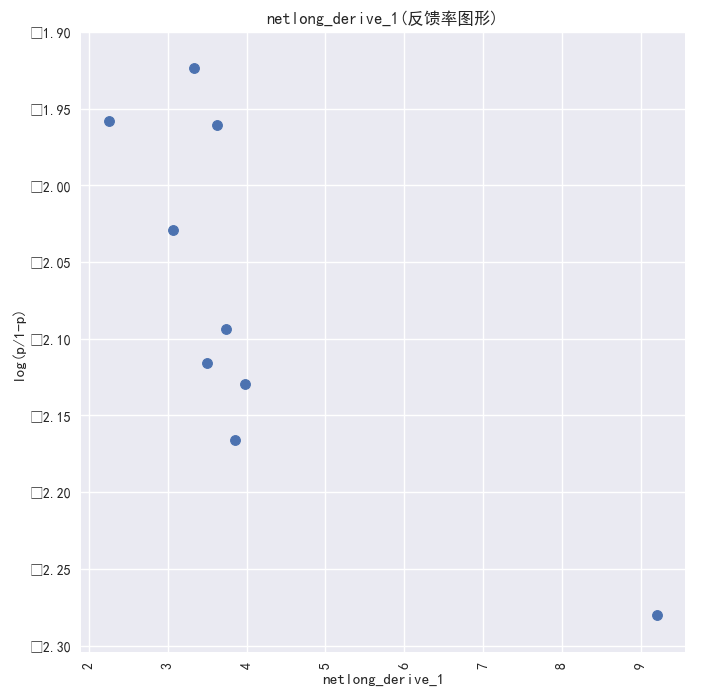

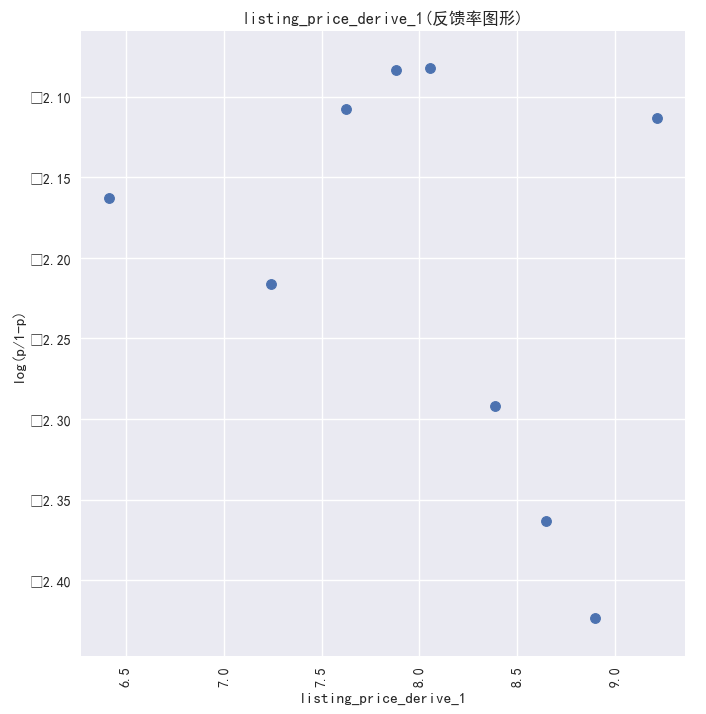

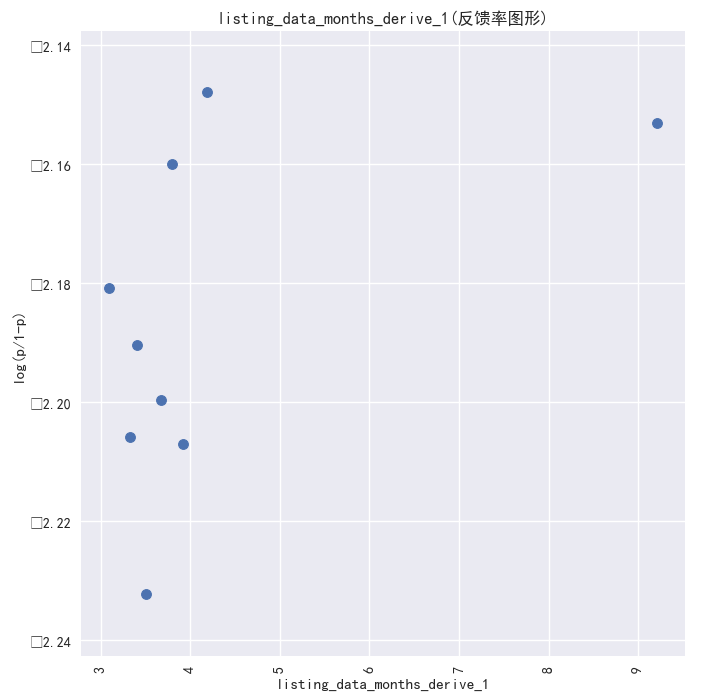

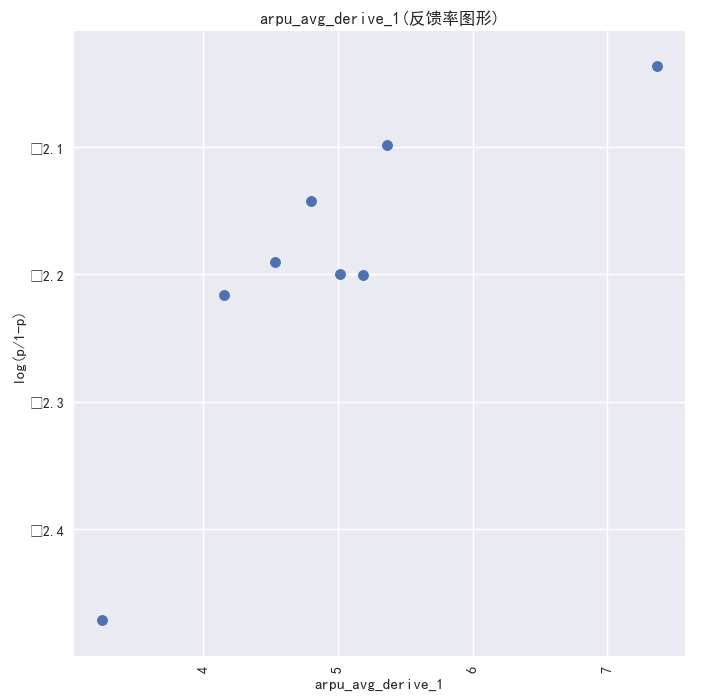

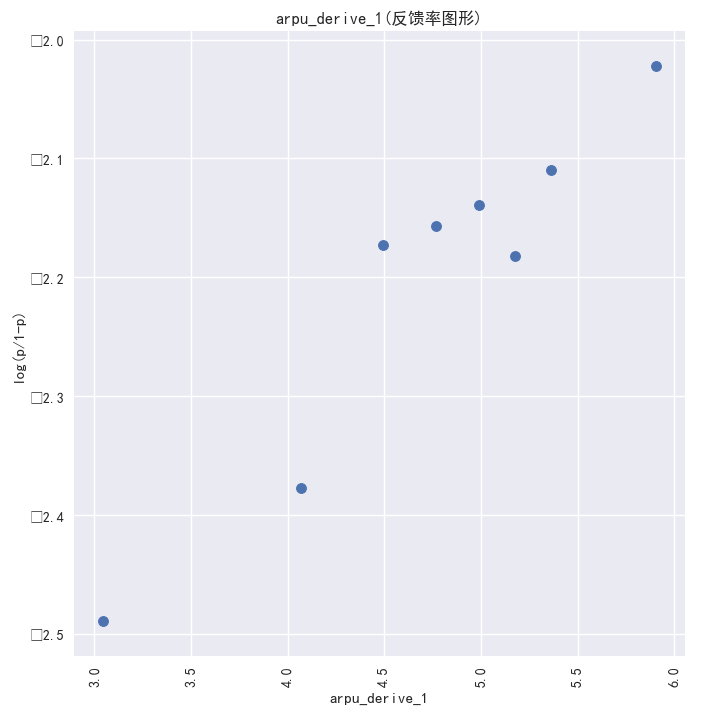

In [361]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=10)
sns.set(font=myfont.get_name())

# 对连续型变量的反馈率数据进行绘图操作：
ContinuousColumnList=['netlong_derive_1', 'listing_price_derive_1','listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1']
for ContinuousColumn in ContinuousColumnList:
    #print(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    ContinuousSampleLogPercentRadio=pd.DataFrame(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    #print(ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1])
    ContinuousSampleLogPercentRadio.replace(float('inf'),ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1],inplace=True)
    ContinuousSampleLogPercentRadio['X_value']=np.log(ContinuousSampleLogPercentRadio.index) #进行对数变换
    #ContinuousSampleLogPercentRadio['X_value']=ContinuousSampleLogPercentRadio.index
    #print(ContinuousSampleLogPercentRadio,ContinuousSampleLogPercentRadio.columns)
    g = sns.FacetGrid(ContinuousSampleLogPercentRadio,palette="Set1", size=7)
    g.map(plt.scatter,'X_value',ContinuousColumn,linewidth=.8)
    print(ContinuousColumn,ContinuousSampleLogPercentRadio)
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(ContinuousColumn, "log(p/1-p)");
    #plt.xlim(1,8)
    plt.title(ContinuousColumn+u'(反馈率图形)')
    g.add_legend()
    g.savefig('广发信用卡模型连续型变量反馈率图像\\'+ContinuousColumn+u'(反馈率图形).png',dpi=100)

# 输出连续型变量图数据

# 分析上面两个cell的输出数据
# 1.分类型变量根据excel中的反馈率相近的分一类，每个特征不超过四类；
# percent一个或者两个相加超过90%的可以删除；
# 最终分为不处理，删除，和手动聚合分类3种。
# 2.连续型变量有趋势的，把异常值用同反馈率（y值同一水平线）填充；
# 没有明显趋势的特征，根据反馈率相近的手动分为不超过4类。

In [363]:
xy_1 = pd.read_excel('20190624广发_信用卡_清洗后.xlsx')

# 输出清洗后数据

In [364]:
xy_1.columns

Index(['target', 'netlong_derive_1', 'listing_price_derive_1',
       'listing_data_months_derive_1', 'arpu_avg_derive_1', 'arpu_derive_1',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

#  根据分析的内容，excel的反馈率笔记来重新对部分变量分类，如下

In [368]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
cat_list = ['target',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.target特征的类型数量是：2
2.arpu特征的类型数量是：25218
3.arpu_avg特征的类型数量是：63600
4.battery_capacity特征的类型数量是：25
5.brand特征的类型数量是：12
6.card_type特征的类型数量是：7
7.family_client特征的类型数量是：2
8.finance特征的类型数量是：2
9.group_client特征的类型数量是：2
10.listing_data_months特征的类型数量是：61
11.listing_price特征的类型数量是：444
12.music特征的类型数量是：2
13.netlong特征的类型数量是：59
14.other_tv特征的类型数量是：2
15.out_prdct_fee_avg特征的类型数量是：2
16.owner_city特征的类型数量是：150
17.owner_city_level特征的类型数量是：11
18.screen_size特征的类型数量是：11
19.sex特征的类型数量是：3
20.storage特征的类型数量是：31
21.user_level特征的类型数量是：9
22.video_member特征的类型数量是：1


In [369]:
xy_1=xy_1[['target',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand', 'card_type',
       'family_client', 'finance', 'group_client', 'listing_data_months',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city', 'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']]

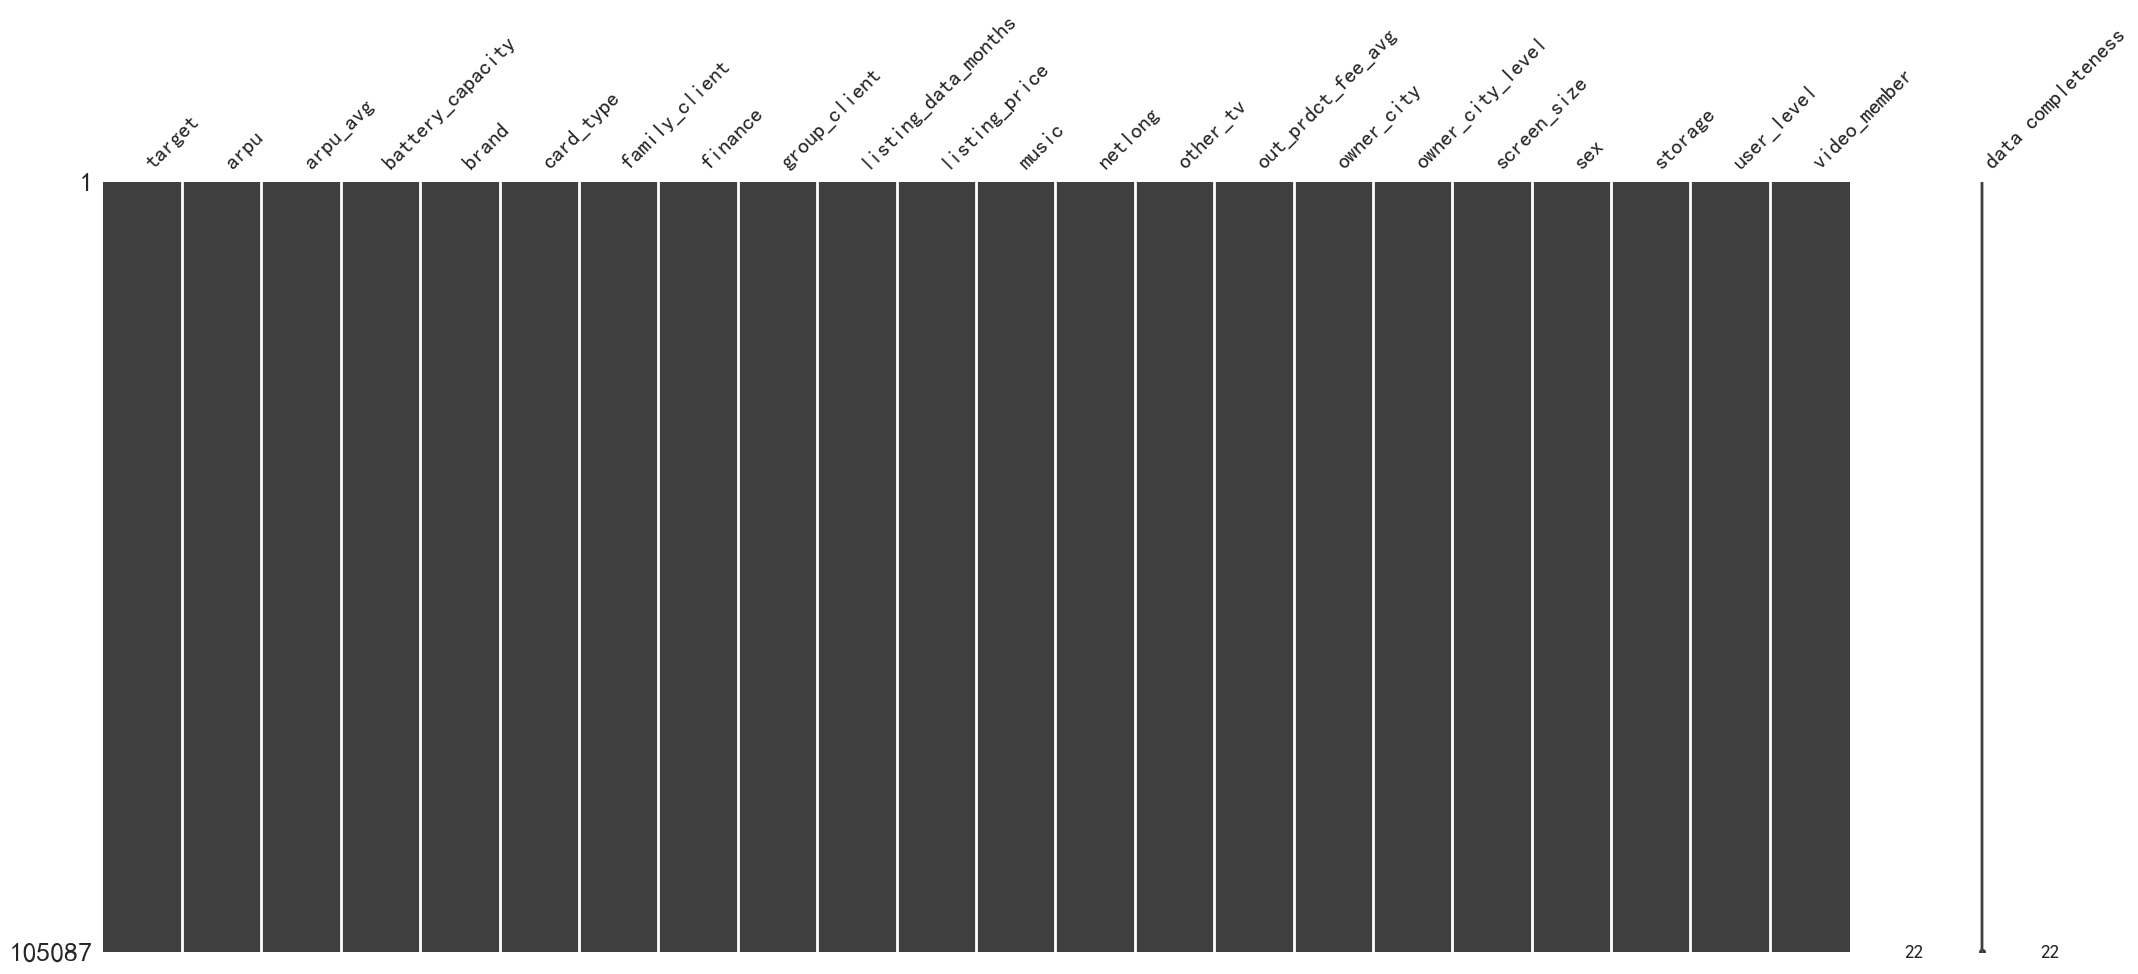

In [370]:
msno.matrix(xy_1,labels = True)

In [371]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,22
Number of observations,105087
Total Missing (%),0.0%
Total size in memory,17.6 MiB
Average record size in memory,176.0 B
Numeric,10
Categorical,4
Boolean,7
Date,0
Text (Unique),0
Rejected,1


In [144]:
# #根据手机上市时间衍生出，上市到现在的累计月份变量listing_data_months
# #核心代码，转换，array转换成str使用[:]，转换成int加减
# def month_sept(data):
#     lst1=[]
#     for n in range(len(data)):
#         a=data.loc[n]['listing_date']
#         if '2019' in str(a):
#             month_num = str(a)[4:6]
#             lst1.append(month_num)
#         elif '2018' in str(a):
#             month_num = 12-int(str(a)[4:6])+4
#             lst1.append(month_num)
#         elif( '2017' in str(a)) and (str(a)!='2017.0'):
#             month_num = 12-int(str(a)[4:6])+4+12
#             lst1.append(month_num)
#         elif '2016' in str(a)and (str(a)!='2016.0'):
#             month_num = 12-int(str(a)[4:6])+4+24
#             lst1.append(month_num)
#         elif '2015' in str(a)and (str(a)!='2015.0'):
#             month_num = 12-int(str(a)[4:6])+4+36
#             lst1.append(month_num)
#         elif '2014' in str(a)and (str(a)!='2014.0'):
#             month_num = 12-int(str(a)[4:6])+4+48
#             lst1.append(month_num)
#         elif '2013' in str(a) and(str(a)!='2013.0'):
#             month_num = 12-int(str(a)[4:6])+4+60
#             lst1.append(month_num)
#     c= pd.concat([xy_1,pd.DataFrame(lst1)],axis=1)
#     c.rename(columns={0:'listing_data_months'},inplace = True)
#     return c
# xy_2 = month_sept(xy_1)

In [145]:
# xy_3 = pd.read_table('city_ranking.txt',names = ['owner_city','owner_city_level'])

In [146]:
# xy_5 = pd.merge(xy_2,xy_3,on='owner_city',how = 'left')

In [415]:
# 第一：空值大于90%排除掉 5项，剩余25项
# expirationtime       5005 non-null object√
# campus_client        7960 non-null float64√
# migu_tv              6368 non-null float64√
# age                  5190 non-null float64√
# adis                 4909 non-null float64√
# 第二：入网时间与入网时长重复，排除，   3项，剩余22项
# nettime              46214 non-null object√
# listing_date         44166 non-null float64√
# myth_fee 0值加上空值超过90%，去除√
# myth_fee has 100909 / 98.6% zeros Zeros
# myth_fee has 1145 / 1.1% missing values Missing
# myth_fee_avg has 100862 / 98.6% zeros Zeros

#去除掉以上列
xy_6 = xy_1[['target',
       'arpu', 'arpu_avg', 'battery_capacity', 'brand',
       'family_client', 'finance', 'group_client',
       'listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg',
       'owner_city_level', 'screen_size', 'sex', 
       'user_level']]

In [403]:
xy_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105087 entries, 0 to 105086
Data columns (total 17 columns):
target               105087 non-null int64
arpu                 105087 non-null float64
arpu_avg             105087 non-null float64
battery_capacity     105087 non-null object
brand                105087 non-null int64
family_client        105087 non-null int64
finance              105087 non-null int64
group_client         105087 non-null int64
listing_price        105087 non-null int64
music                105087 non-null int64
netlong              105087 non-null int64
other_tv             105087 non-null int64
out_prdct_fee_avg    105087 non-null int64
owner_city_level     105087 non-null int64
screen_size          105087 non-null object
sex                  105087 non-null int64
user_level           105087 non-null int64
dtypes: float64(2), int64(13), object(2)
memory usage: 13.6+ MB


In [416]:
# 第四：分为类别型和连续分别衍生 18项     101154缺失30%以上则是，
# 70807以下的数据量要构造成（空值、0、大于0三类），70807以上的数据量空值填充999
# card_type            97392 non-null float64√
# netlong              37821 non-null float64√
# owner_city           97227 non-null object√
# arpu                 101154 non-null float64
# out_prdct_fee        101154 non-null float64
# prdct_fee            101154 non-null float64
# point_fee            101154 non-null float64
# brand                73374 non-null object
# listing_price        68191 non-null float64
# user_level           63019 non-null float64
# sex                  35649 non-null float64
# family_client        30493 non-null float64
# group_client         29219 non-null float64
# music                24849 non-null float64
# video_member         18601 non-null float64
# other_tv             11128 non-null float64√
# finance              10914 non-null float64√
# bank                 10781 non-null float64√
# arpu_avg             101355 non-null float64
# out_prdct_fee_avg    47245 non-null float64
# prdct_fee_avg        101355 non-null float64
# owner_city_level       42548 non-null float64（留用）√
# listing_data_months


##未进入模型删掉
# xy_6['other_tv'].value_counts()
# xy_6['other_tv'] = xy_6['other_tv'].fillna(9999)
# xy_6['other_tv'].value_counts()


##未进入模型删掉
# xy_6['finance'].value_counts()
# xy_6['finance'] = xy_6['finance'].fillna(9999)
# xy_6['finance'].value_counts()


##未进入模型删掉
# xy_6['bank'].value_counts()
# xy_6['bank'] = xy_6['bank'].fillna(9999)
# xy_6['bank'].value_counts()

##去除，效果不好，按owner_citylevel来处理
# xy_6['owner_city'].value_counts()
# xy_6['owner_city'] = xy_6['owner_city'].fillna(9999)
# xy_6['owner_city'].value_counts()


# #删除card_type,同质性高，覆盖率两箱加起来超过了90%
# xy_6['card_type'][xy_6['card_type'].isin([0,8,2,9999])] = 0
# xy_6['card_type'][xy_6['card_type'].isin([1,3,4])] = 1
# xy_6['card_type'].value_counts()


# ##netlong根据反馈率改为三类（原本当做连续型变量，没有规律，聚类效果不好。就从新分类）
# # xy_6['netlong'].value_counts()
# # xy_6['netlong'] = xy_6['netlong'].fillna(9999)
# # xy_6['netlong'][(xy_6['netlong']>0)&(xy_6['netlong']<14)] = 0
# # xy_6['netlong'][(xy_6['netlong']>=14)&(xy_6['netlong']<=57)] = 1
# # xy_6['netlong'].value_counts()
# xy_6['netlong'].value_counts()
# xy_6['netlong'] = xy_6['netlong'].fillna(57)
# xy_6['netlong'].value_counts()
# #分析的时候可以用9999填充空值，方便qcut分箱后看反馈率曲线趋势，之后要用57替换，进入模型，保证模型准确合理

# ##和avg重复，删除
# # arpu 空值填充为999 ，异常值处理
# # xy_6['arpu'].value_counts()
# # xy_6['arpu'].describe()
# # xy_6['arpu'][xy_6['arpu']>500].value_counts()#u+1.5标准差3000
# # xy_6['arpu'][xy_6['arpu']>500] = 41.82#中位数替换异常值
# # xy_6['arpu'] = xy_6['arpu'].fillna(9999)
# # xy_6['arpu'].value_counts()
# # arpu_avg
# xy_6['arpu_avg'].value_counts()#空值填充为999 ，异常值处理
# xy_6['arpu_avg'].describe()
# xy_6['arpu_avg'][xy_6['arpu_avg']>500].value_counts()#u+1.5标准差3000
# xy_6['arpu_avg'][xy_6['arpu_avg']>500] = 500#中位数替换异常值
# xy_6['arpu_avg'] = xy_6['arpu_avg'].fillna(500)
# xy_6['arpu_avg'].value_counts()

# # # out_prdct_fee 空值填充为999，异常值处理,Nan没超过30%，按时0值超过了50%，直接构造成（空，0，大于0三类）
# # xy_6['out_prdct_fee'].value_counts()
# # xy_6['out_prdct_fee'].describe()
# # xy_6['out_prdct_fee'][xy_6['out_prdct_fee']>0] = 1
# # xy_6['out_prdct_fee'] = xy_6['out_prdct_fee'].fillna(9999)
# # xy_6['out_prdct_fee'].value_counts()

# ##与out_prdct_fee重复，删除
# # out_prdct_fee_avg Nan超过30%，直接构造成（空，0，大于0三类）
# # xy_6['out_prdct_fee_avg'].value_counts()
# # xy_6['out_prdct_fee_avg'].describe()
# # xy_6['out_prdct_fee_avg'][xy_6['out_prdct_fee_avg']>0] = 1
# # xy_6['out_prdct_fee_avg'] = xy_6['out_prdct_fee_avg'].fillna(9999)
# # xy_6['out_prdct_fee_avg'].value_counts()


# ##根据结果，未进入模型和avg重复，删除
# # prdct_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
# # xy_6['prdct_fee'].value_counts()
# # # xy_6 = xy_6.drop(xy_6['prdct_fee'][xy_6['prdct_fee']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
# # # xy_6['prdct_fee'].describe()
# # xy_6['prdct_fee'][xy_6['prdct_fee']>500].value_counts()#中位数替换异常值
# # xy_6['prdct_fee'][xy_6['prdct_fee']>500] = 23
# # xy_6['prdct_fee'] = xy_6['prdct_fee'].fillna(9999)
# # xy_6['prdct_fee'].value_counts()




# # prdct_fee_avg空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
# xy_6['prdct_fee_avg'].value_counts()
# # xy_6 = xy_6.drop(xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
# xy_6['prdct_fee_avg'].describe()
# xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500].value_counts()#中位数替换异常值
# xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500] = 500
# xy_6['prdct_fee_avg'] = xy_6['prdct_fee_avg'].fillna(500)
# xy_6['prdct_fee_avg'].value_counts()

# # # point_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值（27824）超过50%，构造（空，0，大于0三类）
# # xy_6['point_fee'].value_counts()
# # xy_6['point_fee'][xy_6['point_fee']>0] = 1
# # xy_6['point_fee'] = xy_6['point_fee'].fillna(9999)
# # xy_6['point_fee'].value_counts()

# # # sex 构造3类
# # xy_6['sex'].value_counts()
# # xy_6['sex'] = xy_6['sex'].fillna(9999)
# # xy_6['sex'].value_counts()

# # # family_client Nan超过30%，构造（空，1两类）
# # xy_6['family_client'].value_counts()
# # xy_6['family_client'] = xy_6['family_client'].fillna(9999)
# # xy_6['family_client'].value_counts()

# # # group_client  Nan超过30%，构造（空，1两类）
# # xy_6['group_client'].value_counts()
# # xy_6['group_client'] = xy_6['group_client'].fillna(9999)
# # xy_6['group_client'].value_counts()

# ##没进入模型删掉
# # music  Nan超过30%，构造（空，1两类）
# # xy_6['music'].value_counts()
# # xy_6['music'] = xy_6['music'].fillna(9999)
# # xy_6['music'].value_counts()

# ##没进入模型删掉
# # video_member Nan超过30%，构造（空，1两类）
# # xy_6['video_member'].value_counts()
# # xy_6['video_member'][xy_6['video_member'].notnull()] = 1
# # xy_6['video_member'] = xy_6['video_member'].fillna(9999)
# # xy_6['video_member'].value_counts()

# ##未进入模型，删除
# # listing_data_months 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
# # xy_6['listing_data_months'].value_counts()
# # xy_6['listing_data_months'] = xy_6['listing_data_months'].fillna(9999)

# # xy_6['listing_data_months'].value_counts()


# ##user_level根据反馈率最终进入模型有几个箱子，没有好的解释性，还是根据（兴业传奇游戏用户分类变量反馈率统计.xlsx）反馈率分为三类
# # user_level  空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
# xy_6['user_level'].value_counts()
# xy_6['user_level'][xy_6['user_level'].isin([0,1,2])] = 0
# xy_6['user_level'][xy_6['user_level'].isin([3,9999])] = 1
# xy_6['user_level'][xy_6['user_level'].isin([4,5,6,7])] = 2
# xy_6['user_level'].value_counts()


# # listing_price 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
# # xy_6['listing_price'].value_counts()
# xy_6['listing_price'] = xy_6['listing_price'][xy_6['listing_price']==9999]=300
# # xy_6['listing_price'].value_counts()


# # ##城市等级根据反馈率分为三类
# # # owner_city_level
# xy_6['owner_city_level'].value_counts()
# xy_6['owner_city_level'][xy_6['owner_city_level'].isin([1,2,3,4])] = 1
# xy_6['owner_city_level'][xy_6['owner_city_level'].isin([5,6,7,8])] = 2
# xy_6['owner_city_level'][xy_6['owner_city_level'].isin([9,10,9999])] = 3
# xy_6['owner_city_level'].value_counts()


# # ##brand根据反馈率聚类的结果不太好，同时几个箱子进入最终模型，还是分10个主要牌子，把那些少见多类的牌子放到其他11，共12类
# # # brand 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
# # xy_6['brand'].value_counts()
# # xy_6['brand'] = xy_6['brand'].fillna('空值')
# # xy_6['brand'][~xy_6['brand'].isin(['vivo','OPPO','苹果','小米','华为','华为荣耀','三星','金立','酷派','魅族','空值'])] ='其它品牌'
# # xy_6['brand'].value_counts()
# # # #以上，异常值，空值处理完毕
# ['target', 'arpu', 'arpu_avg', 'battery_capacity', 'brand','family_client', 'finance', 'group_client','listing_price', 'music', 'netlong', 'other_tv', 'out_prdct_fee_avg','owner_city_level', 'screen_size', 'sex', 'storage','user_level']


# 手机电池容量：
xy_6['battery_capacity'][xy_6['battery_capacity'].isin(['3075mah','2900mah','3010mah','2850mah','2400mah','3050mah','4100mah','3100mah','其它电池','4000mah'])] = 1
xy_6['battery_capacity'][xy_6['battery_capacity'].isin(['2350mah','3000mah','2930mah','2000mah','1715mah','2300mah','2500mah','2550mah','1800mah','1900mah','2200mah','2910mah','2750mah','2600mah','1960mah'])] = 2

# 手机品牌：
xy_6['brand'][(xy_6['brand']==8)|(xy_6['brand']==10)|(xy_6['brand']==6)] = 1000
xy_6['brand'][(xy_6['brand']==11)|(xy_6['brand']==7)|(xy_6['brand']==12)|(xy_6['brand']==4)] = 2000
xy_6['brand'][(xy_6['brand']==9)|(xy_6['brand']==3)|(xy_6['brand']==1)|(xy_6['brand']==2)|(xy_6['brand']==5)] = 3000

# 在网时长：

xy_6['netlong'][xy_6['netlong']<=24] =1
xy_6['netlong'][(xy_6['netlong']>24)&(xy_6['netlong']<=48)] = 2
xy_6['netlong'][xy_6['netlong']>48] = 3

# owner_city_level
xy_6['owner_city_level'][xy_6['owner_city_level']>=7] =3
xy_6['owner_city_level'][(xy_6['owner_city_level']>=4) & (xy_6['owner_city_level']<7)] = 2
xy_6['owner_city_level'][xy_6['owner_city_level']<=3] = 1

# screen_size
xy_6['screen_size'][xy_6['screen_size'].isin(['5.7','空值','4.5','5.2','5.5','5.8'])] = 1
xy_6['screen_size'][xy_6['screen_size'].isin(['其它屏幕','3.5','4.7','5.1','5.9'])] = 2

# user_level
xy_6['user_level'][(xy_6['user_level']>=5) & (xy_6['user_level']<=7)] =100
xy_6['user_level'][(xy_6['user_level']<=4) | (xy_6['user_level']==9999)] = 200

In [385]:
##品牌改为数字
#数据类型转化-品牌转化为数字（算法需要数字）
# def brand_num(data):
#     title_mapping = {'苹果':1,'华为':2,'小米':3,'华为荣耀':4,'三星':5,'OPPO':6,'vivo':7,'魅族':8,'金立':9,'酷派':10,'空值':11,'其它品牌':12}
#     data['brand'] = data['brand'].map(title_mapping)
#     return data
# xy_6 = brand_num(xy_6)
# xy_6['brand'][xy_6['brand'].isin([1])] = 1
# xy_6['brand'][xy_6['brand'].isin([2])] = 2
# xy_6['brand'][xy_6['brand'].isin([3,4,5,6,7,8])] = 3
# xy_6['brand'][xy_6['brand'].isin([9,10,11,12])] = 4

In [417]:
xy_6[:10]

,target,arpu,arpu_avg,battery_capacity,brand,family_client,finance,group_client,listing_price,music,netlong,other_tv,out_prdct_fee_avg,owner_city_level,screen_size,sex,user_level
0,1,95.60,94.100001,1,1000,9999,9999,1,2799,1,2,9999,1,1,1,9999,200
1,0,54.85,55.653333,1,2000,9999,9999,1,2498,9999,1,9999,1,1,1,9999,200
2,0,149.00,102.989998,2,2000,1,1,9999,1198,1,2,1,1,1,2,9999,200
3,0,37.10,31.553333,1,1000,9999,9999,1,1999,9999,3,9999,1,1,1,1,200
4,0,133.29,126.463333,1,2000,1,9999,9999,2498,1,3,1,1,1,1,1,200
5,0,255.03,194.309998,2,3000,9999,9999,9999,2399,9999,2,9999,1,1,1,9999,200
6,1,259.23,203.713338,1,3000,1,1,9999,2299,9999,2,1,1,1,1,9999,200
7,0,58.00,64.699999,2,3000,9999,9999,9999,6088,9999,2,9999,1,1,2,0,200
8,0,90.04,116.666667,1,1000,1,9999,9999,2199,1,3,1,1,1,1,9999,200
9,0,123.00,117.603333,1,1000,1,9999,9999,1999,1,2,9999,1,1,1,9999,200


In [418]:
xy_6.columns

Index(['target', 'arpu', 'arpu_avg', 'battery_capacity', 'brand',
       'family_client', 'finance', 'group_client', 'listing_price', 'music',
       'netlong', 'other_tv', 'out_prdct_fee_avg', 'owner_city_level',
       'screen_size', 'sex', 'user_level'],
      dtype='object')

In [419]:
# 对模型的离散型变量进行虚拟变量处理：onehot编码需要str格式
ClassifyColumnsList=['battery_capacity', 'brand',
       'family_client', 'finance', 'group_client', 'music',
       'netlong', 'other_tv', 'out_prdct_fee_avg', 'owner_city_level',
       'screen_size', 'sex', 'user_level']

for ClassifyColumn in ClassifyColumnsList:
    #print(ClassifyColumn,len(ChuanQi_basic_df[ClassifyColumn].value_counts()))
    xy_6[ClassifyColumn]=xy_6[ClassifyColumn].astype('str')
xy_7 = xy_6[['target', 'arpu', 'arpu_avg', 'battery_capacity', 'brand',
       'family_client', 'finance', 'group_client', 'listing_price', 'music',
       'netlong', 'other_tv', 'out_prdct_fee_avg', 'owner_city_level',
       'screen_size', 'sex', 'user_level']]
##筛选特定列
display(xy_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105087 entries, 0 to 105086
Data columns (total 17 columns):
target               105087 non-null int64
arpu                 105087 non-null float64
arpu_avg             105087 non-null float64
battery_capacity     105087 non-null object
brand                105087 non-null object
family_client        105087 non-null object
finance              105087 non-null object
group_client         105087 non-null object
listing_price        105087 non-null int64
music                105087 non-null object
netlong              105087 non-null object
other_tv             105087 non-null object
out_prdct_fee_avg    105087 non-null object
owner_city_level     105087 non-null object
screen_size          105087 non-null object
sex                  105087 non-null object
user_level           105087 non-null object
dtypes: float64(2), int64(2), object(13)
memory usage: 13.6+ MB


None

In [420]:
xy_7.brand.value_counts()

2000    46808
3000    45725
1000    12554
Name: brand, dtype: int64

In [421]:
xy_7_onehot=pd.get_dummies(xy_7)
xy_7_onehot.columns

Index(['target', 'arpu', 'arpu_avg', 'listing_price', 'battery_capacity_1',
       'battery_capacity_2', 'brand_1000', 'brand_2000', 'brand_3000',
       'family_client_1', 'family_client_9999', 'finance_1', 'finance_9999',
       'group_client_1', 'group_client_9999', 'music_1', 'music_9999',
       'netlong_1', 'netlong_2', 'netlong_3', 'other_tv_1', 'other_tv_9999',
       'out_prdct_fee_avg_0', 'out_prdct_fee_avg_1', 'owner_city_level_1',
       'screen_size_1', 'screen_size_2', 'sex_0', 'sex_1', 'sex_9999',
       'user_level_100', 'user_level_200'],
      dtype='object')

In [423]:
np.isnan(xy_7_onehot).any()#False表示无缺失值
xy_7_onehot[xy_7_onehot.isnull().values==True]

,target,arpu,arpu_avg,listing_price,battery_capacity_1,battery_capacity_2,brand_1000,brand_2000,brand_3000,family_client_1,...,out_prdct_fee_avg_0,out_prdct_fee_avg_1,owner_city_level_1,screen_size_1,screen_size_2,sex_0,sex_1,sex_9999,user_level_100,user_level_200


In [425]:
from sklearn import linear_model as lr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
import sklearn.metrics as sm
class_weight = dict({1:9,0:1})#配置权重，1万正样本权重为9,9万随机样本的权重为1
df_x = xy_7_onehot[[ 'arpu', 'arpu_avg', 'listing_price', 'battery_capacity_1',
       'battery_capacity_2', 'brand_1000', 'brand_2000', 'brand_3000',
       'family_client_1', 'family_client_9999', 'finance_1', 'finance_9999',
       'group_client_1', 'group_client_9999', 'music_1', 'music_9999',
       'netlong_1', 'netlong_2', 'netlong_3', 'other_tv_1', 'other_tv_9999',
       'out_prdct_fee_avg_0', 'out_prdct_fee_avg_1', 'owner_city_level_1',
       'screen_size_1', 'screen_size_2', 'sex_0', 'sex_1', 'sex_9999',
       'user_level_100', 'user_level_200']]
df_y = xy_7_onehot['target']
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)

#逻辑回归
model = linear_model.LogisticRegression(class_weight = class_weight)
# model = linear_model.Lasso()
model.fit(X_train, Y_train)
y_train_score = model.decision_function(X_train)#用于计算训练集的KS值
y_score = model.decision_function(X_test)#计算预测结果概率值，用于计算测试集的KS值
y_test = model.predict(X_test)
print('模型预测成功率为：',(y_test == Y_test).sum() / len(y_test))
y_test1 = pd.Series(y_test)#**numpy没有value_counts,故要转化为pd.Series.此处是预测值
Y_test1 = pd.Series(Y_test)
print('真实测试数据：\n',Y_test1.value_counts())
print('预测的测试数据：\n', y_test1.value_counts())

模型预测成功率为： 0.5378159257003654
真实测试数据：
 0    47203
1     5341
Name: target, dtype: int64
预测的测试数据：
 0    27308
1    25236
dtype: int64


In [427]:
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

In [428]:
#对数据的训练集进行标准化
ss = StandardScaler()
X_StandardScaler = ss.fit(X_train)
X_train=X_StandardScaler.transform(X_train)
X_test= X_StandardScaler.transform(X_test)
# X_train = ss.fit_transform(X_train)     #先拟合数据在进行标准化
# X_test = ss.fit_transform(X_test)
display(len(X_train),len(X_test))

52543

52544

In [429]:
# class_weight = dict({1:9, 0:1})
# lr = LogisticRegressionCV(multi_class="ovr",fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty="l2",solver="lbfgs",tol=0.01,class_weight=class_weight)

lr = LogisticRegressionCV(multi_class="ovr",fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty="l2",solver="lbfgs",tol=0.01)

re = lr.fit(X_train,Y_train)
r_train = re.score(X_train,Y_train)


print("R值(准确率):",r_train)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test)[:5])     #sigmoid函数转化的值，即：概率p

R值(准确率): 0.9002150619492606
参数: [[ 0.10189391  0.00483328 -0.01767036  0.01771816 -0.01771816  0.04820056
   0.04118373 -0.07273105 -0.04509812  0.04509812  0.02282991 -0.02282991
  -0.04452632  0.04452632  0.02421285 -0.02421285  0.02574823  0.02766475
  -0.04031767 -0.01181796  0.01181796 -0.02180683  0.02180683  0.
   0.00015705 -0.00015705 -0.1249258   0.0335952   0.06740108  0.02171922
  -0.02171922]]
截距: [-2.2367497]
稀疏化特征比率:3.23%
=========sigmoid函数转化的值，即：概率p=========
[[0.85759023 0.14240977]
 [0.88239969 0.11760031]
 [0.9065295  0.0934705 ]
 [0.91215544 0.08784456]
 [0.9189872  0.0810128 ]]


In [430]:
Y_test_predict = lr.predict(X_test)      #预测

# 计算测试集的准确率···
r_test = re.score(X_test,Y_test)
print("R值(准确率):",r_test)
display(Y_test_predict.sum())

R值(准确率): 0.8983518574908648


0

In [431]:
# 绘制模型的Roc/Auc值的曲线图

from sklearn import metrics

lr_y_test_score = lr.decision_function(X_test)
lr_fpr_test,lr_tpr_test,lr_threasholds_test = metrics.roc_curve(Y_test.ravel(),lr_y_test_score.ravel())
lr_auc_test = metrics.auc(lr_fpr_test,lr_tpr_test)

lr_y_train_score = lr.decision_function(X_train)
lr_fpr_train,lr_tpr_train,lr_threasholds_train = metrics.roc_curve(Y_train.ravel(),lr_y_train_score.ravel())  #Y_predict
lr_auc_train = metrics.auc(lr_fpr_train,lr_tpr_train)


print("Logistic算法R值(训练):",lr.score(X_train,Y_train))
print("Logistic算法AUC值(训练):",lr_auc_train)

print("Logistic算法R值(测试):",lr.score(X_test,Y_test))
print("Logistic算法AUC值(测试):",lr_auc_test)

Logistic算法R值(训练): 0.9002150619492606
Logistic算法AUC值(训练): 0.5840280668193856
Logistic算法R值(测试): 0.8983518574908648
Logistic算法AUC值(测试): 0.5824809532576818


In [432]:
# 在训练集上统计十等分检验表：
Y_train_proba=lr.predict_proba(X_train)
Y_train_predict=lr.predict(X_train)
Y_train_predict_true=Y_train_proba[:,1]

Y_test_proba=lr.predict_proba(X_test)
Y_test_predict=lr.predict(X_test)
Y_test_predict_true=Y_test_proba[:,1]
Y_train_predict.sum()

0

In [439]:
# 训练集的十等分表：
IndexSeriers=pd.Series(np.arange(0,10,1))


Result_KS_10_Dic={'Train_KS_10':{},'Test_KS_10':{}}
Result_KS_10_Dic['Train_KS_10']['y_train']=Y_train
Result_KS_10_Dic['Train_KS_10']['y_train_predict']=Y_train_predict
Result_KS_10_Dic['Train_KS_10']['y_train_true_proba']=Y_train_predict_true
Train_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Train_KS_10'])

Result_KS_10_Dic['Test_KS_10']['y_test']=Y_test
Result_KS_10_Dic['Test_KS_10']['y_test_predict']=Y_test_predict
Result_KS_10_Dic['Test_KS_10']['y_test_true_proba']=Y_test_predict_true
Test_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Test_KS_10'])
display(Train_KS_10_df.head(),len(Train_KS_10_df),Test_KS_10_df.head(),len(Test_KS_10_df))
# 对概率值进行降序排列：
Train_KS_10_df.sort_values('y_train_true_proba',ascending=False,inplace=True)
Train_KS_10_df.reset_index(inplace=True)
Train_KS_10_df['true_proba_cluster']=pd.qcut(Train_KS_10_df.y_train_true_proba,10)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.DataFrame(Train_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['KS_10_cluster_crowd_number'])

# 对测试值进行降序排列：
Test_KS_10_df.sort_values('y_test_true_proba',ascending=False,inplace=True)
Test_KS_10_df.reset_index(inplace=True)
Test_KS_10_df['true_proba_cluster']=pd.qcut(Test_KS_10_df.y_test_true_proba,10)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.DataFrame(Test_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])


,y_train,y_train_predict,y_train_true_proba
11803,0,0,0.076317
101331,1,0,0.148274
23389,0,0,0.102177
22093,0,0,0.093597
40186,0,0,0.109611


52543

,y_test,y_test_predict,y_test_true_proba
19821,0,0,0.142410
25747,0,0,0.117600
92075,1,0,0.093470
81522,0,0,0.087845
11320,0,0,0.081013


52544

,index,true_proba_cluster,0
0,"(0.135, 0.24]",5255,0
1,"(0.123, 0.135]",5254,1
2,"(0.114, 0.123]",5254,2
3,"(0.106, 0.114]",5254,3
4,"(0.0983, 0.106]",5254,4
5,"(0.0914, 0.0983]",5255,5
6,"(0.0847, 0.0914]",5254,6
7,"(0.0764, 0.0847]",5254,7
8,"(0.0651, 0.0764]",5254,8
9,"(0.0314, 0.0651]",5255,9


,index,true_proba_cluster,0
0,"(0.136, 0.241]",5255,0
1,"(0.123, 0.136]",5254,1
2,"(0.114, 0.123]",5254,2
3,"(0.106, 0.114]",5255,3
4,"(0.0986, 0.106]",5254,4
5,"(0.0917, 0.0986]",5254,5
6,"(0.0849, 0.0917]",5255,6
7,"(0.0765, 0.0849]",5254,7
8,"(0.0653, 0.0765]",5254,8
9,"(0.0359, 0.0653]",5255,9


In [441]:
# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['KS_10_cluster_map'][Result_KS_10_Dic['KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['KS_10_cluster_map'])

# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['Test_KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['Test_KS_10_cluster_map'][Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['Test_KS_10_cluster_map'])

{Interval(0.135, 0.24, closed='right'): 0,
 Interval(0.123, 0.135, closed='right'): 1,
 Interval(0.114, 0.123, closed='right'): 2,
 Interval(0.106, 0.114, closed='right'): 3,
 Interval(0.0983, 0.106, closed='right'): 4,
 Interval(0.0914, 0.0983, closed='right'): 5,
 Interval(0.0847, 0.0914, closed='right'): 6,
 Interval(0.0764, 0.0847, closed='right'): 7,
 Interval(0.0651, 0.0764, closed='right'): 8,
 Interval(0.0314, 0.0651, closed='right'): 9}

{Interval(0.136, 0.241, closed='right'): 0,
 Interval(0.123, 0.136, closed='right'): 1,
 Interval(0.114, 0.123, closed='right'): 2,
 Interval(0.106, 0.114, closed='right'): 3,
 Interval(0.0986, 0.106, closed='right'): 4,
 Interval(0.0917, 0.0986, closed='right'): 5,
 Interval(0.0849, 0.0917, closed='right'): 6,
 Interval(0.0765, 0.0849, closed='right'): 7,
 Interval(0.0653, 0.0765, closed='right'): 8,
 Interval(0.0359, 0.0653, closed='right'): 9}

In [442]:
Train_KS_10_df['true_proba_cluster_map']=Train_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['KS_10_cluster_map'])

Test_KS_10_df['true_proba_cluster_map']=Test_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['Test_KS_10_cluster_map'])

In [443]:
Train_KS_10_df_groupby_true_proba_cluster_map=Train_KS_10_df.groupby('true_proba_cluster_map')

Test_KS_10_df_groupby_true_proba_cluster_map=Test_KS_10_df.groupby('true_proba_cluster_map')

In [444]:
Result_KS_10_Dic['KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Train_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['KS_10_TPV_Number'][proba_cluster_map]=(Train_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_train']==1).sum()
    
Result_KS_10_Dic['Test_KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Test_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['Test_KS_10_TPV_Number'][proba_cluster_map]=(Test_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_test']==1).sum()


In [445]:
Result_KS_10_Dic['Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['KS_10_TPV_Number'])
Result_KS_10_Dic['Real_True_Sample_number_rate3']=Result_KS_10_Dic['Real_True_Sample_number']/Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['KS_10_TPV_Number'].values())).sum())

#Result_KS_10_Dic['Test_KS_10_TPV_Number']
Result_KS_10_Dic['Test_Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['Test_KS_10_TPV_Number'])
Result_KS_10_Dic['Test_Real_True_Sample_number_rate3']=Result_KS_10_Dic['Test_Real_True_Sample_number']/Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Test_Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['Test_KS_10_TPV_Number'].values())).sum())



In [446]:
Result_KS_10_Statistics_df=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Real_True_Sample_number'],Result_KS_10_Dic['Real_True_Sample_number_rate3'],Result_KS_10_Dic['Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_df.columns=['CustomNumber','True_Sample_CustomNumber','Real_True_Sample_number_rate3','Real_True_Sample_number_rate4']
Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_df['ModelAcquireVaue']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']


Result_KS_10_Statistics_Test_df=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Test_Real_True_Sample_number'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate3'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_Test_df.columns=['Test_CustomNumber','Test_True_Sample_CustomNumber','Test_Real_True_Sample_number_rate3','Test_Real_True_Sample_number_rate4']
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']


In [447]:
Result_KS_10_Dic['KS_Point']={'x_point':Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['KS_Point'])

Result_KS_10_Dic['Test_KS_Point']={'x_point':Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['Test_KS_Point'])

{'x_point': 3, 'y_point': 0.5033377837116155}

{'x_point': 3, 'y_point': 0.5045871559633027}

In [448]:
#每个箱子中箱子正样本比例Real_True_Sample_number_rate3=True_Sample_CustomNumber/ CustomNumber
#箱子正样本占总正样本比例Real_True_Sample_number_rate4=True_Sample_CustomNumber/ΣTrue_Sample_CustomNumber
#累计和Real_True_Sample_number_rate4_accumulate=ΣReal_True_Sample_number_rate4
display(Result_KS_10_Statistics_df,Result_KS_10_Statistics_Test_df)

,CustomNumber,True_Sample_CustomNumber,Real_True_Sample_number_rate3,Real_True_Sample_number_rate4,Real_True_Sample_number_rate4_accumulate,Real_True_Sample_number_rate_random,ModelAcquireVaue
0,5255,794,0.151094,0.151440,0.151440,0.000000,0.151440
1,5254,645,0.122764,0.123021,0.274461,0.111111,0.163350
2,5254,606,0.115341,0.115583,0.390044,0.222222,0.167822
3,5254,594,0.113057,0.113294,0.503338,0.333333,0.170004
4,5254,546,0.103921,0.104139,0.607477,0.444444,0.163032
5,5255,485,0.092293,0.092504,0.699981,0.555556,0.144425
6,5254,460,0.087552,0.087736,0.787717,0.666667,0.121050
7,5254,501,0.095356,0.095556,0.883273,0.777778,0.105495
8,5254,342,0.065093,0.065230,0.948503,0.888889,0.059614
9,5255,270,0.051380,0.051497,1.000000,1.000000,0.000000


,Test_CustomNumber,Test_True_Sample_CustomNumber,Test_Real_True_Sample_number_rate3,Test_Real_True_Sample_number_rate4,Test_Real_True_Sample_number_rate4_accumulate,Test_Real_True_Sample_number_rate_random,Test_ModelAcquireVaue
0,5255,790,0.150333,0.147912,0.147912,0.000000,0.147912
1,5254,673,0.128093,0.126006,0.273919,0.111111,0.162808
2,5254,630,0.119909,0.117955,0.391874,0.222222,0.169652
3,5255,602,0.114558,0.112713,0.504587,0.333333,0.171254
4,5254,559,0.106395,0.104662,0.609249,0.444444,0.164805
5,5254,480,0.091359,0.089871,0.699120,0.555556,0.143564
6,5255,471,0.089629,0.088186,0.787306,0.666667,0.120639
7,5254,447,0.085078,0.083692,0.870998,0.777778,0.093220
8,5254,398,0.075752,0.074518,0.945516,0.888889,0.056627
9,5255,291,0.055376,0.054484,1.000000,1.000000,0.000000


#  以上为输出KS十等分表

Optimization terminated successfully.
         Current function value: 0.324249
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324073
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324249
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324478
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324582
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324304
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.324504
  

Optimization terminated successfully.
         Current function value: 0.322873
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323137
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322943
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323000
         Iterations 7
Add  brand_3000                     with p-value 5.99985e-19
Optimization terminat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.321867
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321796
         Iterations 7
Add  arpu                           with p-value 6.42426e-11
Optimization terminated successfully.
         Current function value: 0.321469
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321415
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321427
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321239
         Iterations 7
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.320816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320862
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320842
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320842
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320826
  

Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320653
  

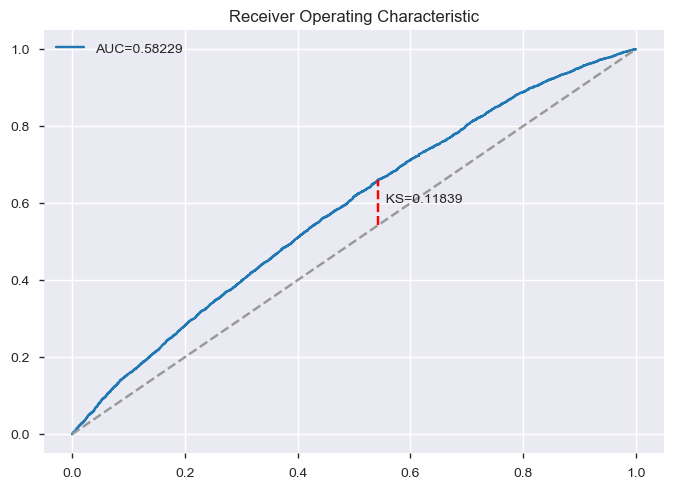

In [449]:
#显著性分析代码：p>|z|大于0.01的进入模型
#AUC（模型稳定性）和KS（区分能力）值计算
# Coef. :参数、系数
# Std. Err.：系数Coef.的方差的平方根standard error
# [95% Conf. Interval] 系数Coef.的95%置信区间
# P>|z|: 值小于或等于0.05表示结果显著。 
#两个变量协方差分析相关性强，保留Z值绝对值大（显著性强）的那个，如brand和list_price相关性强，就把Z值大的brand2留下
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose = True):
    included = list(initial_list)
 
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
 
result = stepwise_selection(X_train, Y_train)#模板改这里的参数X_train, Y_train
 
print('resulting features:')
print(result)

lr = sm.Logit(Y_train,sm.add_constant(X_train[result]))
rst = lr.fit()
print(rst.summary2())

y_predicted = rst.predict(sm.add_constant(X_train[result]))

fpr, tpr, thresholds = roc_curve(Y_train,y_predicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

In [452]:
# VIF<5则满足要求，去除掉listing_price,再跑上面模型
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X = np.matrix(xy_7_onehot[['owner_city_level_1', 'sex_0', 'brand_3000', 'group_client_9999', 'arpu', 'netlong_3', 'family_client_1', 'user_level_100', 'out_prdct_fee_avg_0', 'music_1', 'finance_9999']])
VIF_list = [vif(X, i) for i in range(X.shape[1])]
max_VIF = max(VIF_list)
print (VIF_list)

[12.105195829960081, 1.0304293928667427, 1.0428502005332494, 1.090160917747206, 1.2525961280388433, 1.0740690148915915, 1.3810243045522472, 1.1635731463143775, 1.0097239052675662, 1.3301500695121447, 1.060621405907727]


In [173]:
# #代码：导出不含代码只含结果的HTML（代码保密作用）
# from IPython.display import display
# from IPython.display import HTML
# import IPython.core.display as di
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
# HTML('<style>{}</style>'.format(CSS))